# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 11.52

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

<!-- `### ваше решение тут ###` -->

$$
    Q'(w) = \frac{2}{\ell} \cdot X^T (Xw - y)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [217]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [219]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [220]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [221]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: 124681848


* **StochasticDescent**: 124681879


* **MomentumDescent**: 124681924


* **Adam**: 124681975


* **LinearRegression**: 124681404

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [285]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [223]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 10
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [224]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [225]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

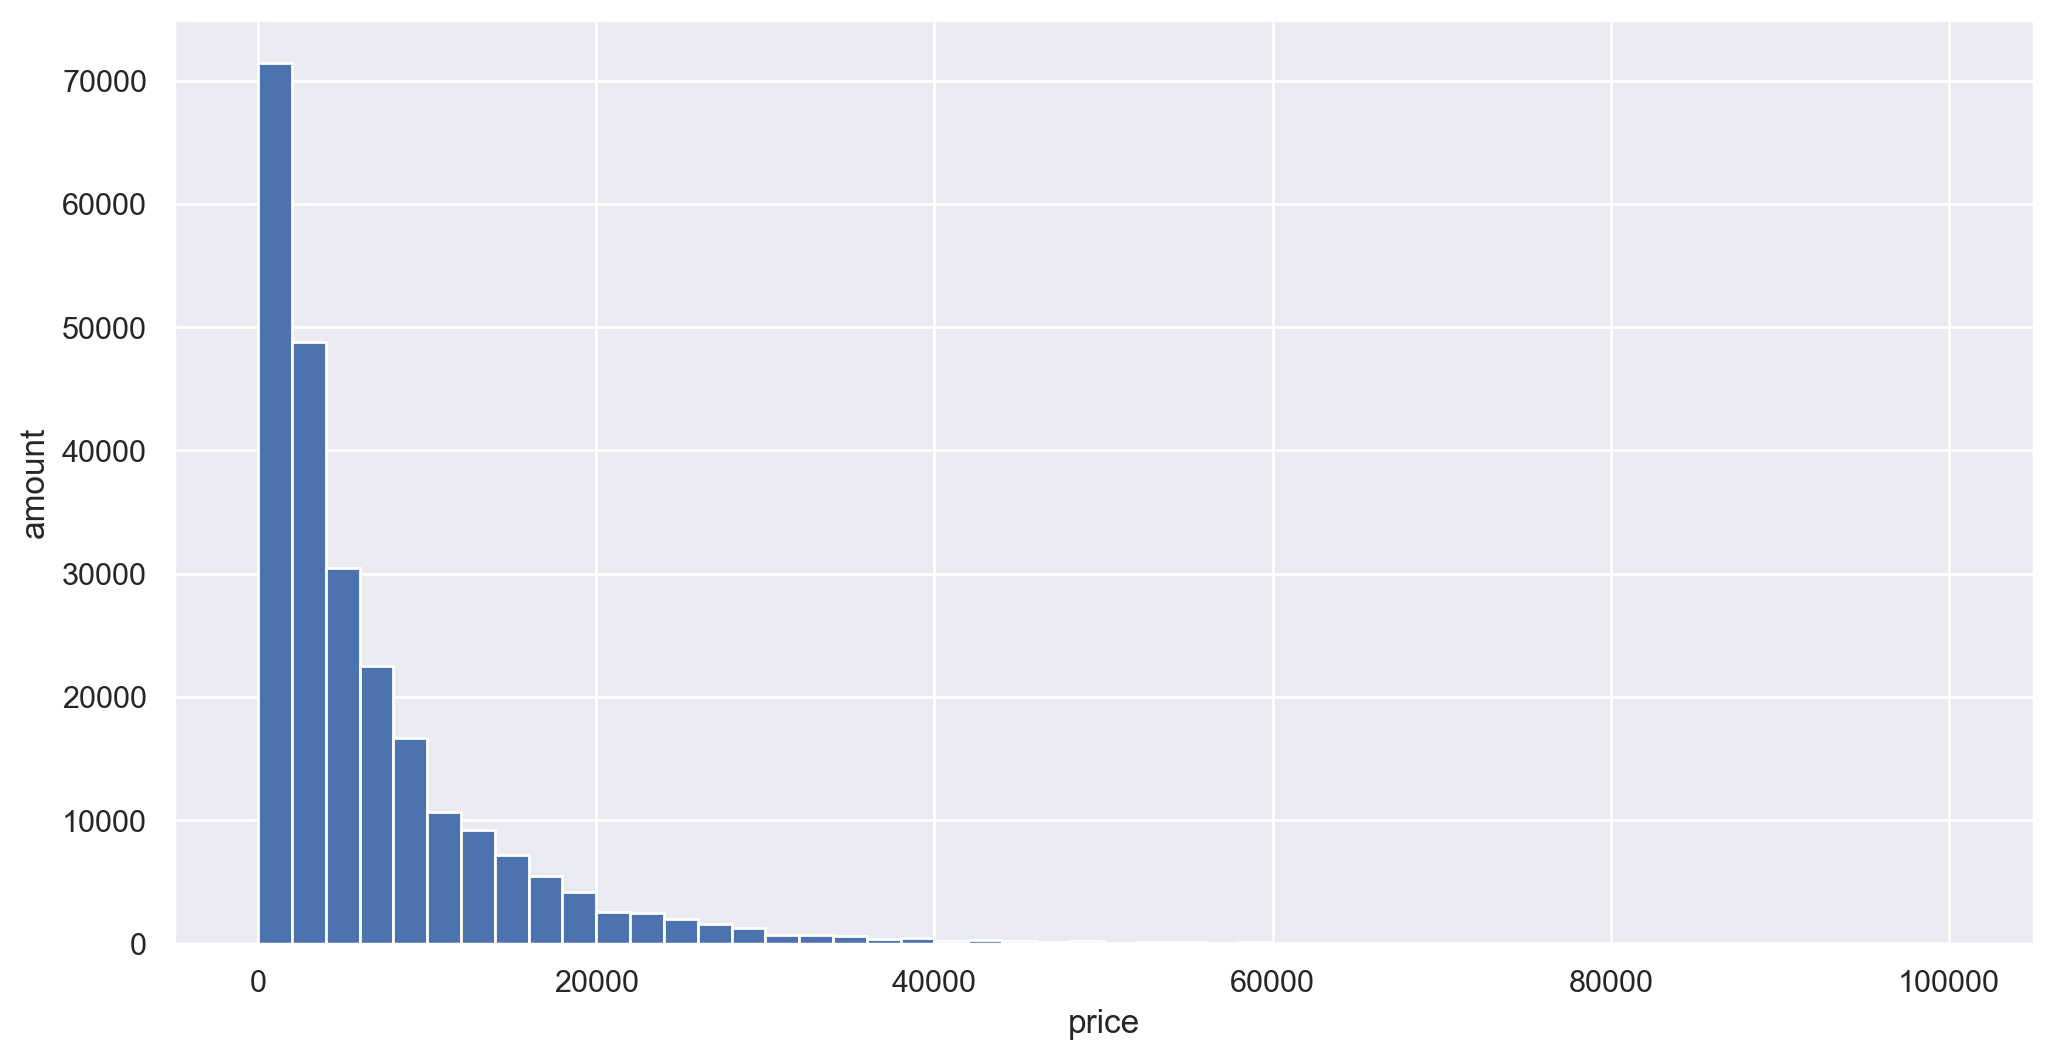

In [226]:
plt.hist(data['price'], bins=50)
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

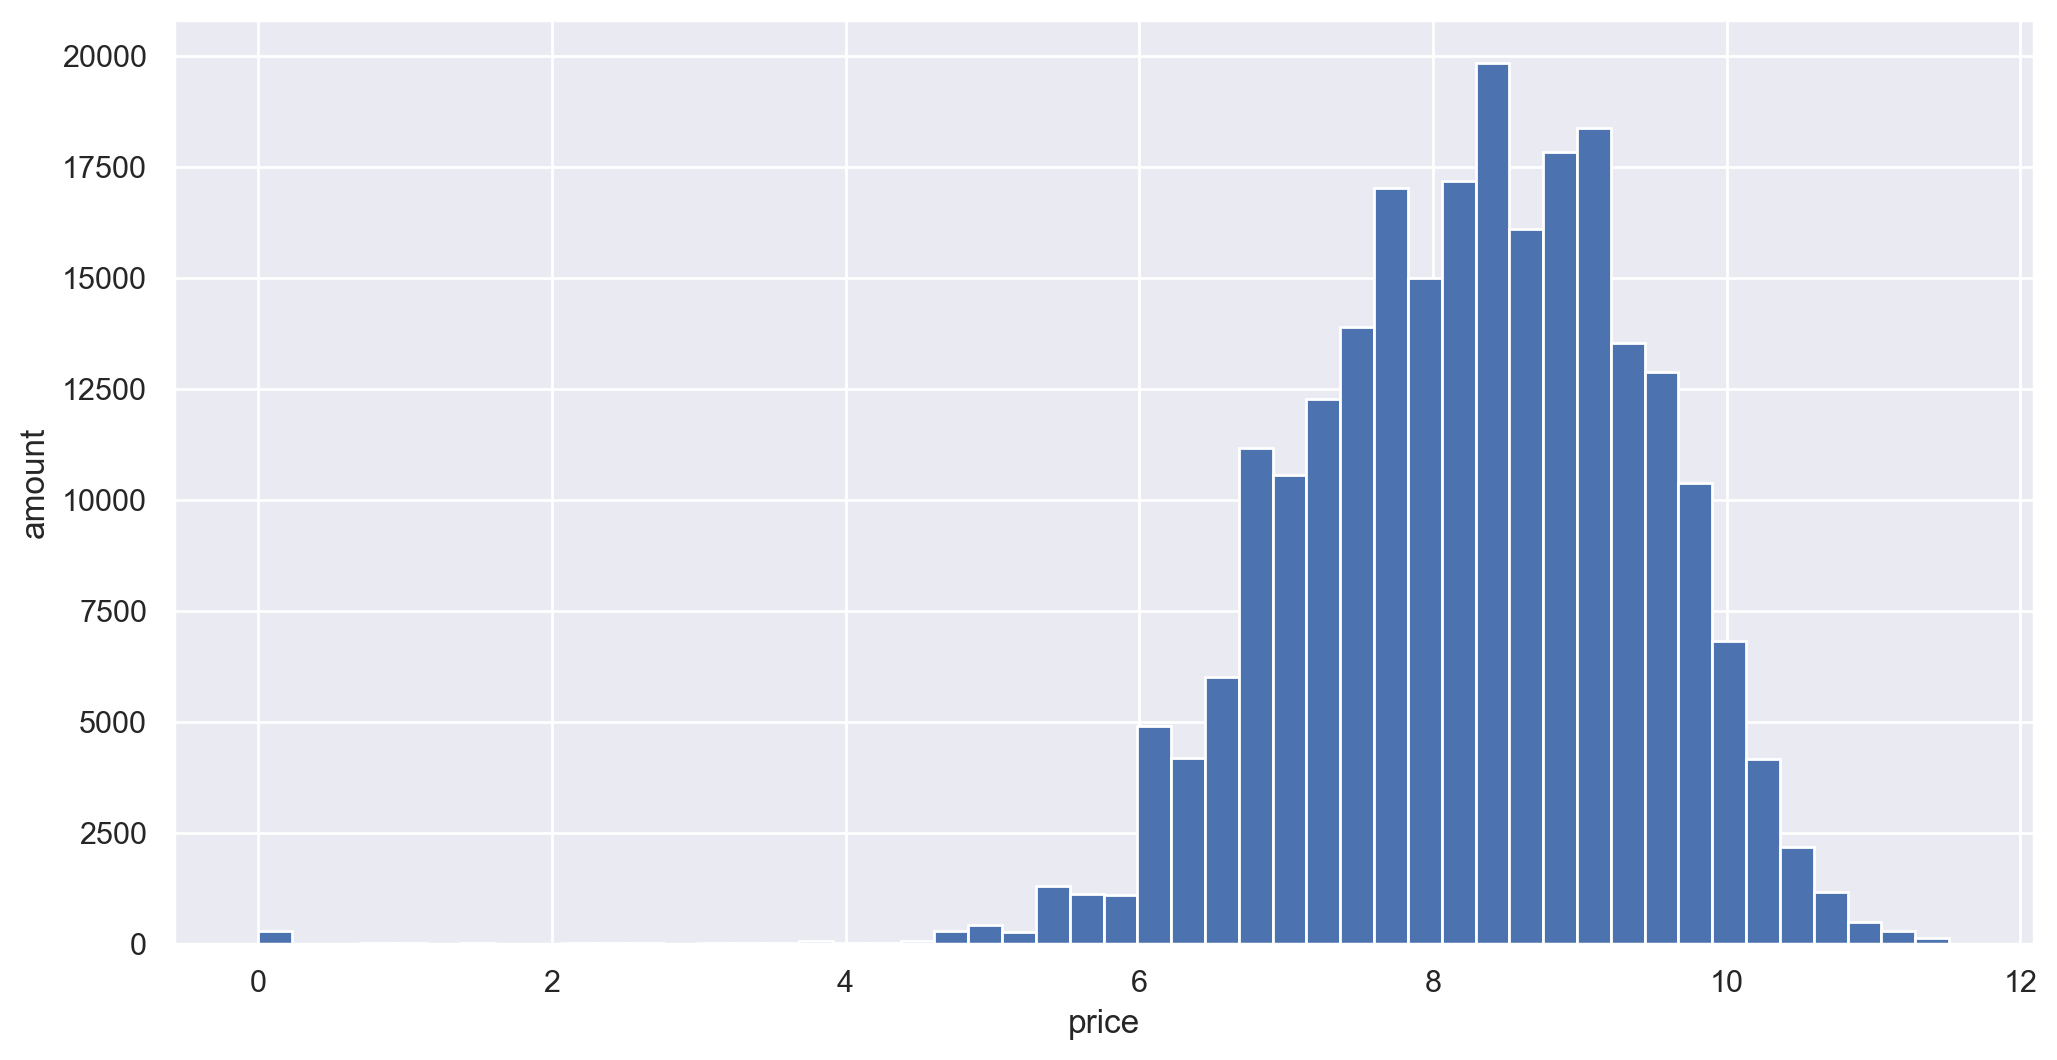

In [227]:
plt.hist(np.log(data['price']), bins=50)
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

In [228]:
data['log_price'] = np.log(data['price'].copy(deep=True))

In [229]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313220
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188689
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.476972
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696213
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.600902


In [230]:
data = data[(data['log_price'] < data['log_price'].mean() + 3 * data['log_price'].std()) & (data['log_price'] > data['log_price'].mean() - 3 * data['log_price'].std())]

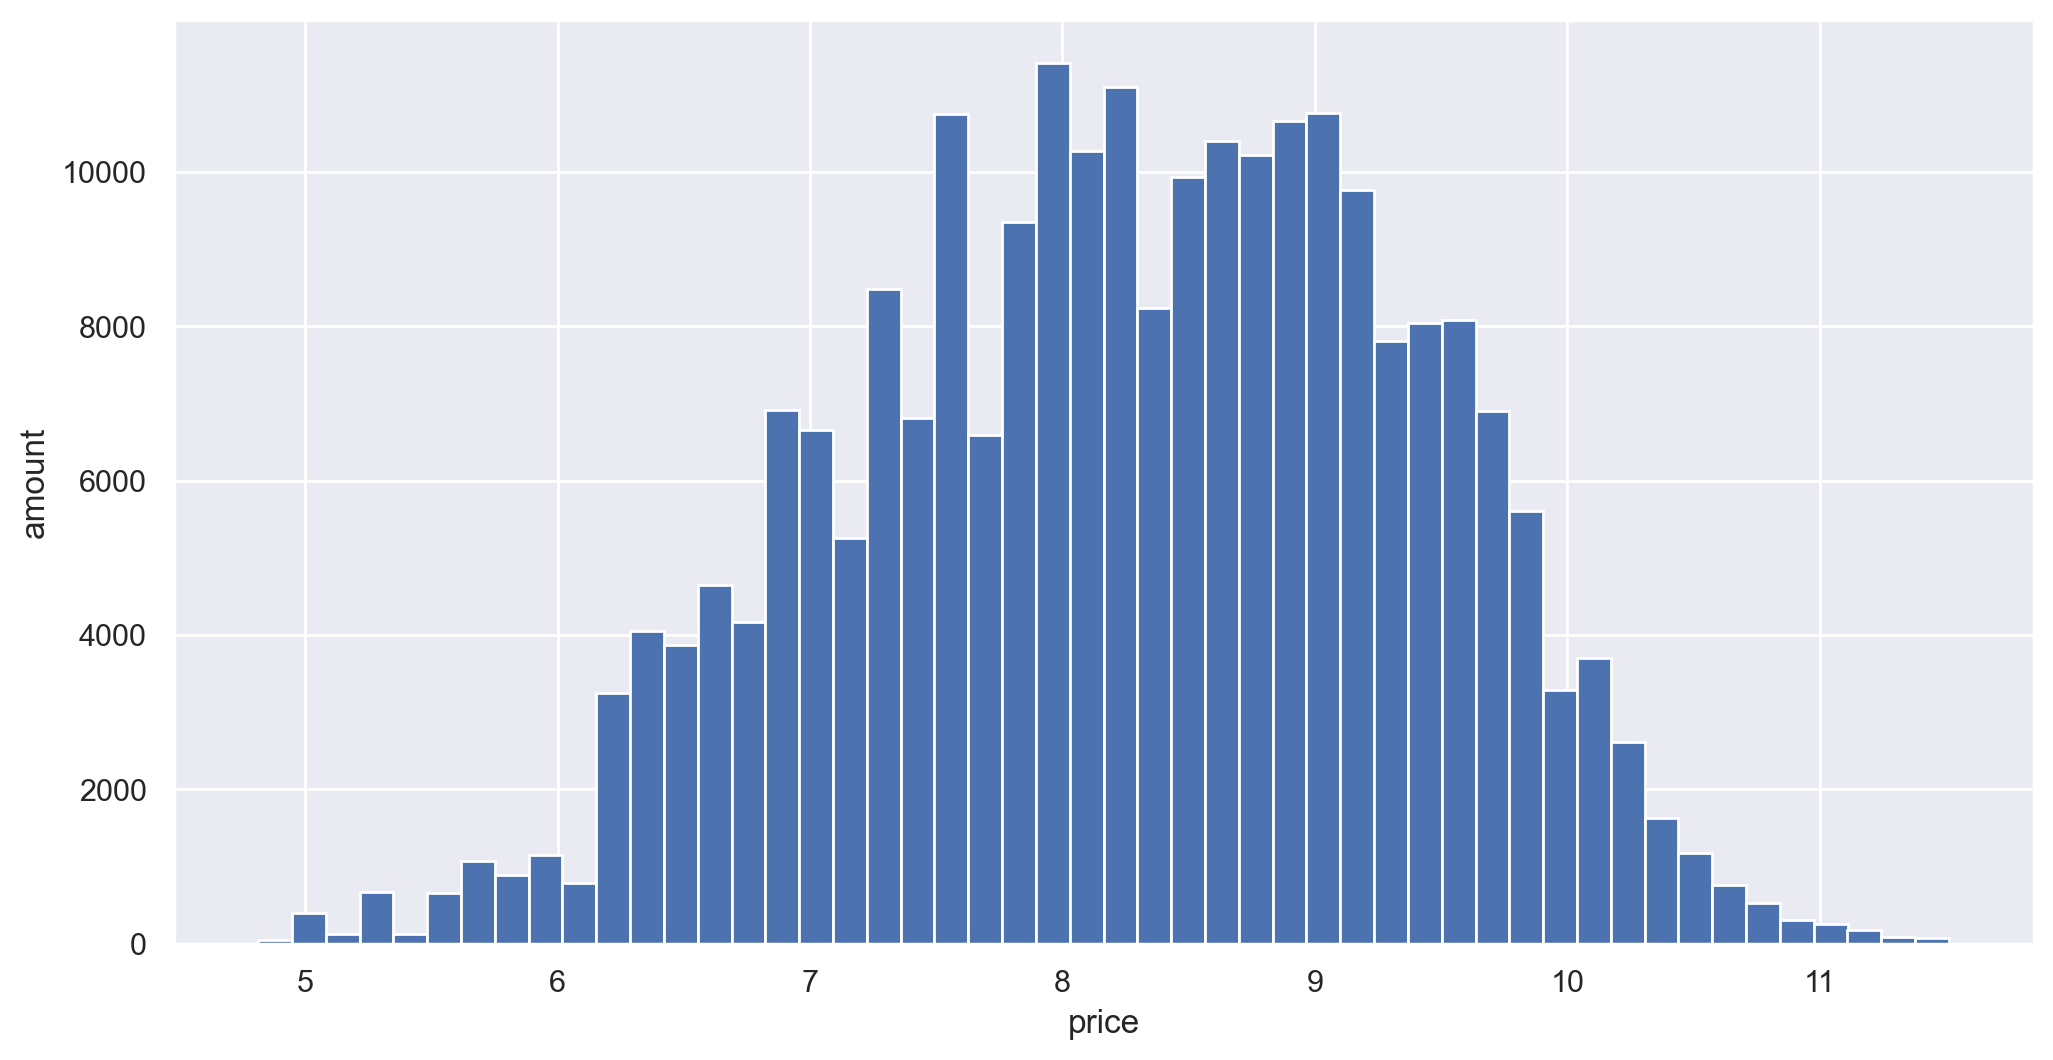

In [231]:
plt.hist(data['log_price'], bins=50)
plt.xlabel('price')
plt.ylabel('amount')
plt.show()

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240461 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              240461 non-null  object 
 1   model              240461 non-null  object 
 2   vehicleType        240461 non-null  object 
 3   gearbox            240461 non-null  object 
 4   fuelType           240461 non-null  object 
 5   notRepairedDamage  240461 non-null  object 
 6   powerPS            240461 non-null  int64  
 7   kilometer          240461 non-null  int64  
 8   autoAgeMonths      240461 non-null  int64  
 9   price              240461 non-null  int64  
 10  log_price          240461 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 22.0+ MB


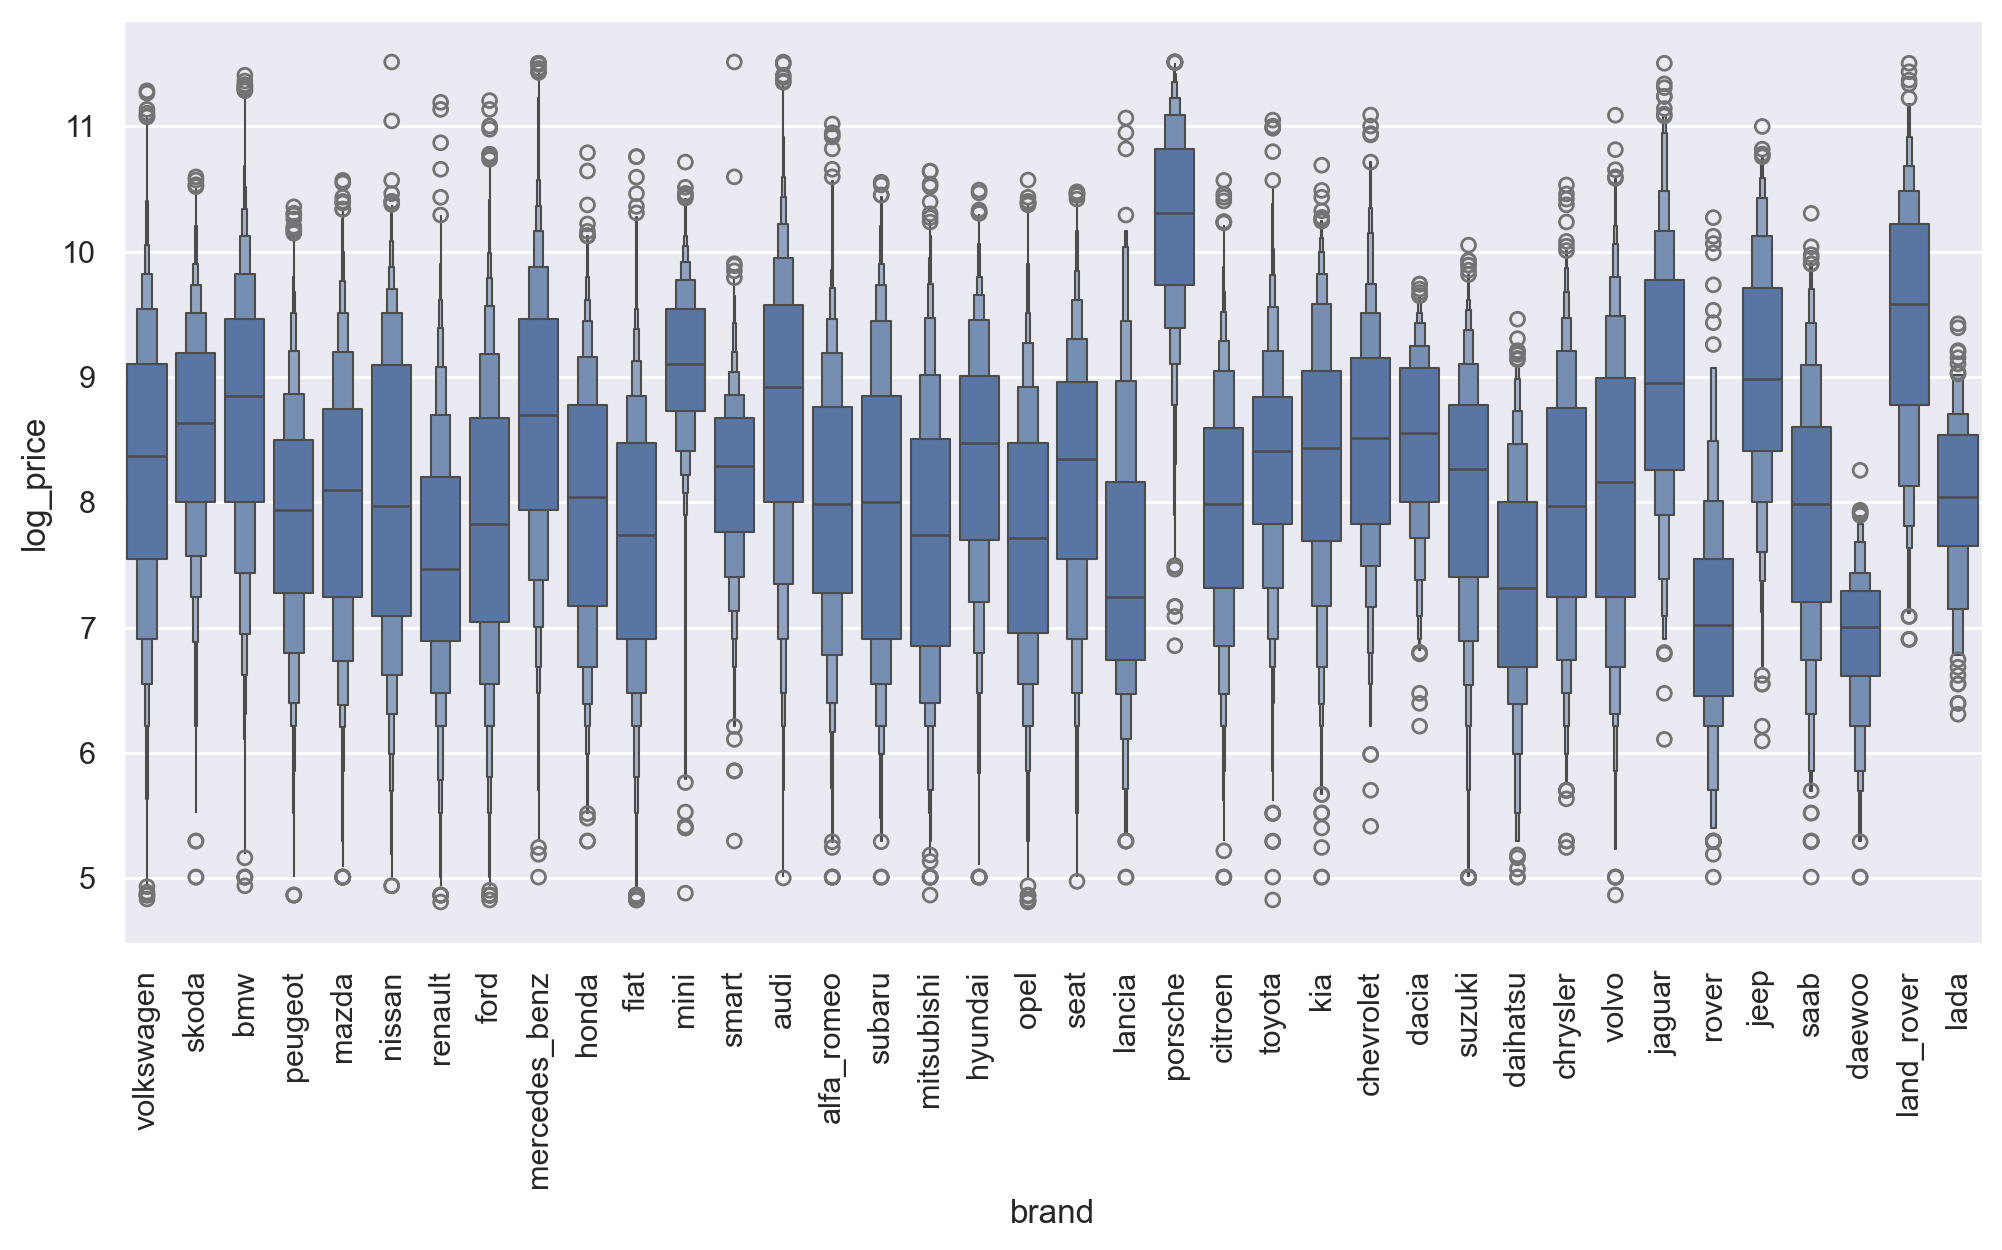

In [233]:
sns.boxenplot(data=data, x='brand', y='log_price')
plt.xticks(rotation=90)
plt.show()

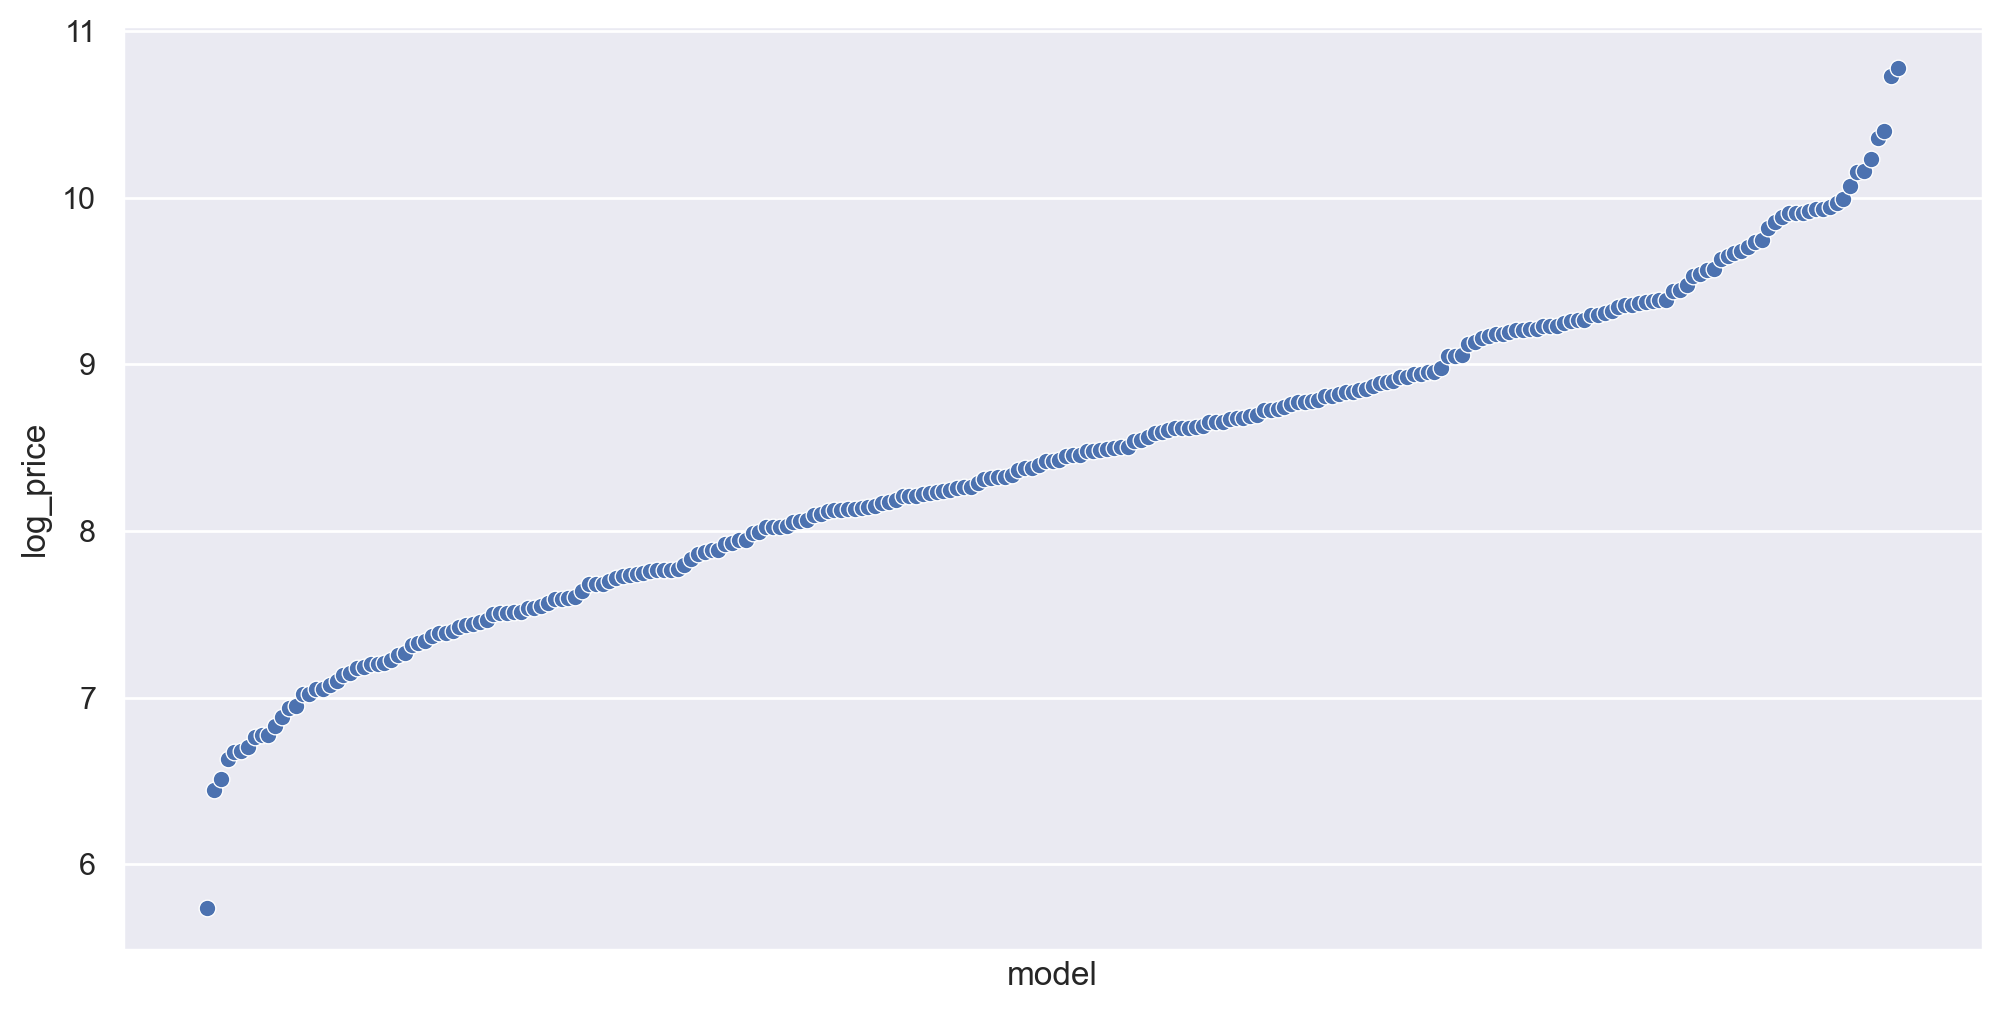

In [234]:
sns.scatterplot(data=data.groupby("model")[["model", "log_price"]].mean(numeric_only=True).sort_values("log_price"), x="model", y="log_price")
plt.xticks(ticks=[])
plt.show()

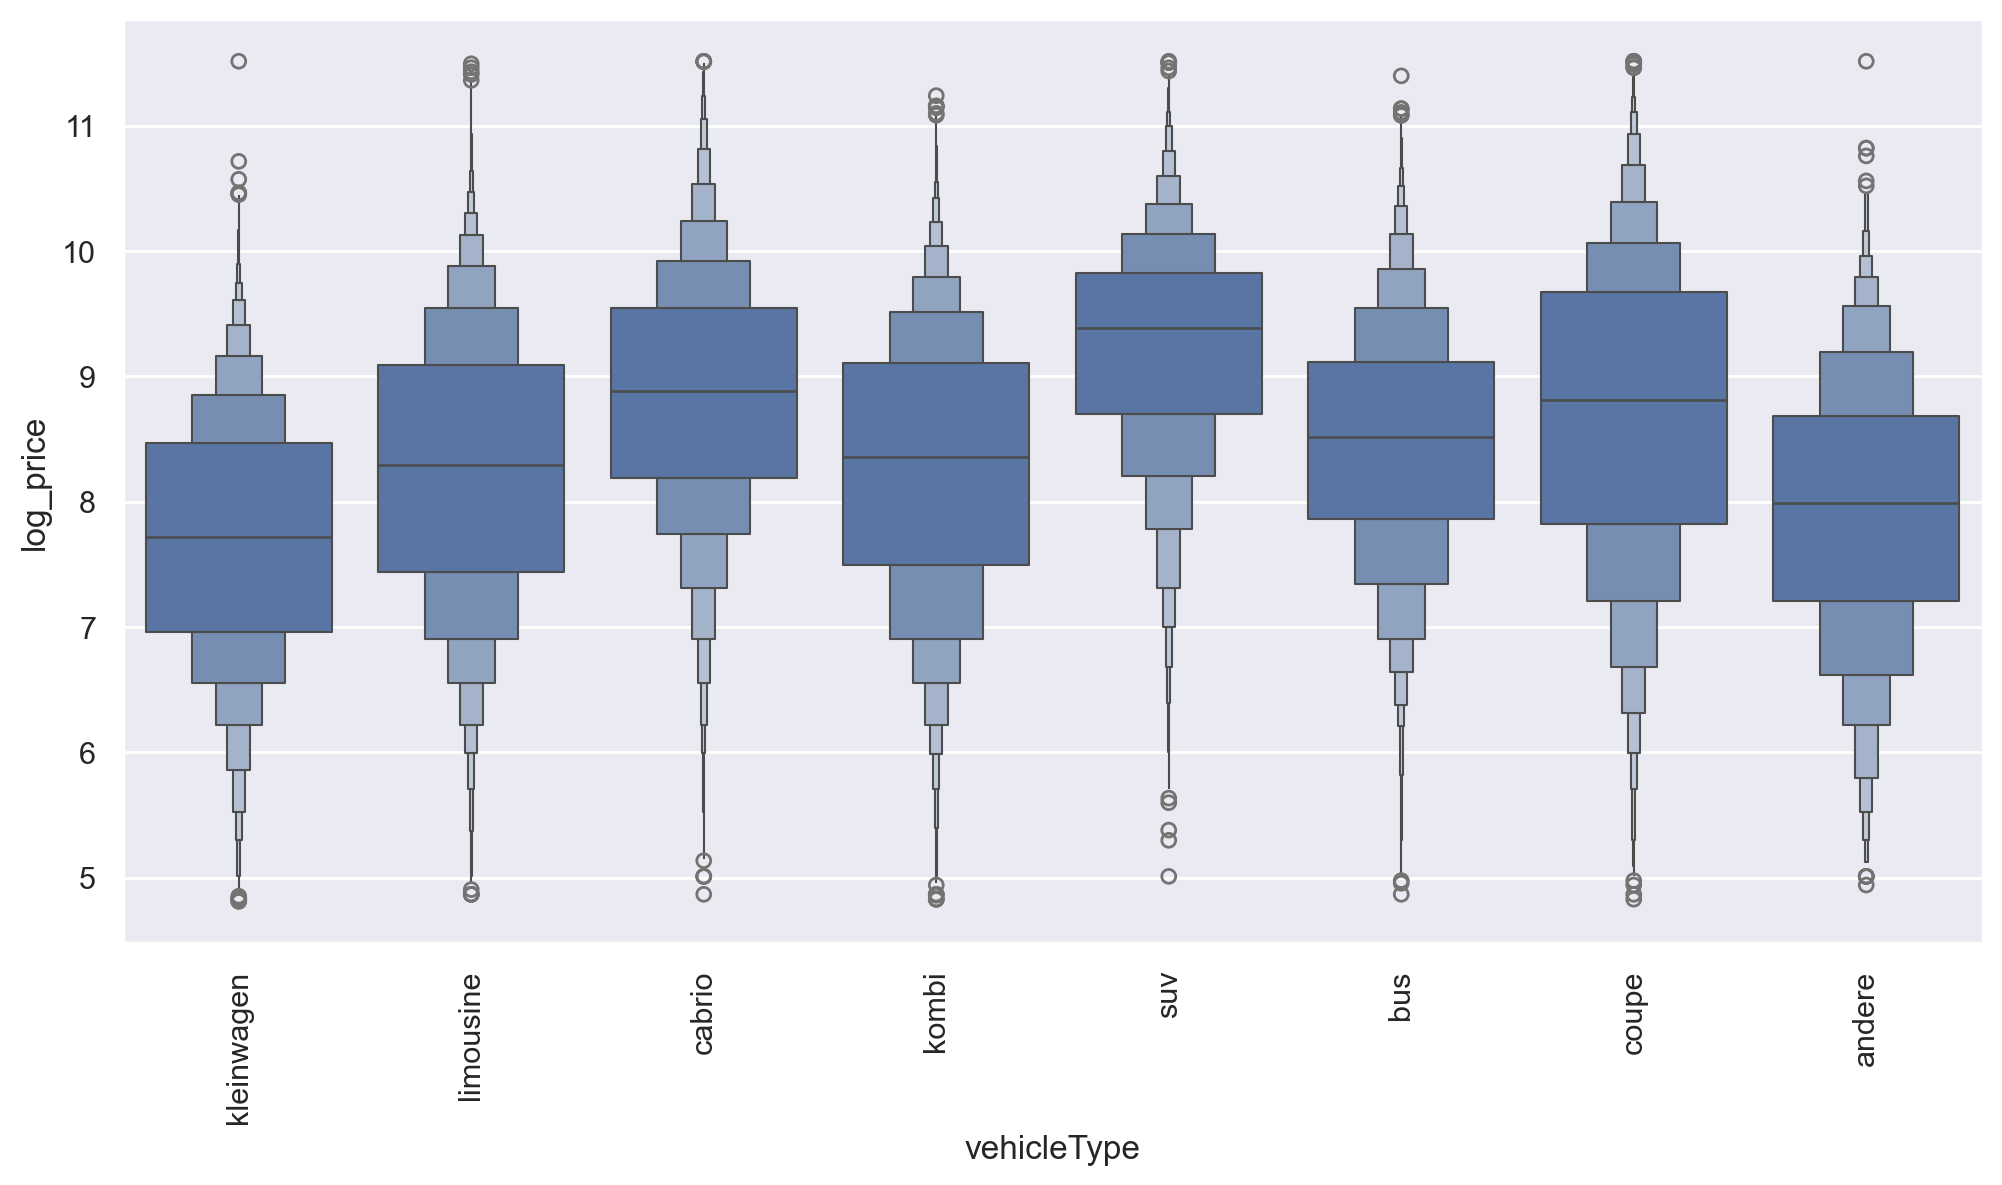

In [235]:
sns.boxenplot(data=data, x='vehicleType', y='log_price')
plt.xticks(rotation=90)
plt.show()

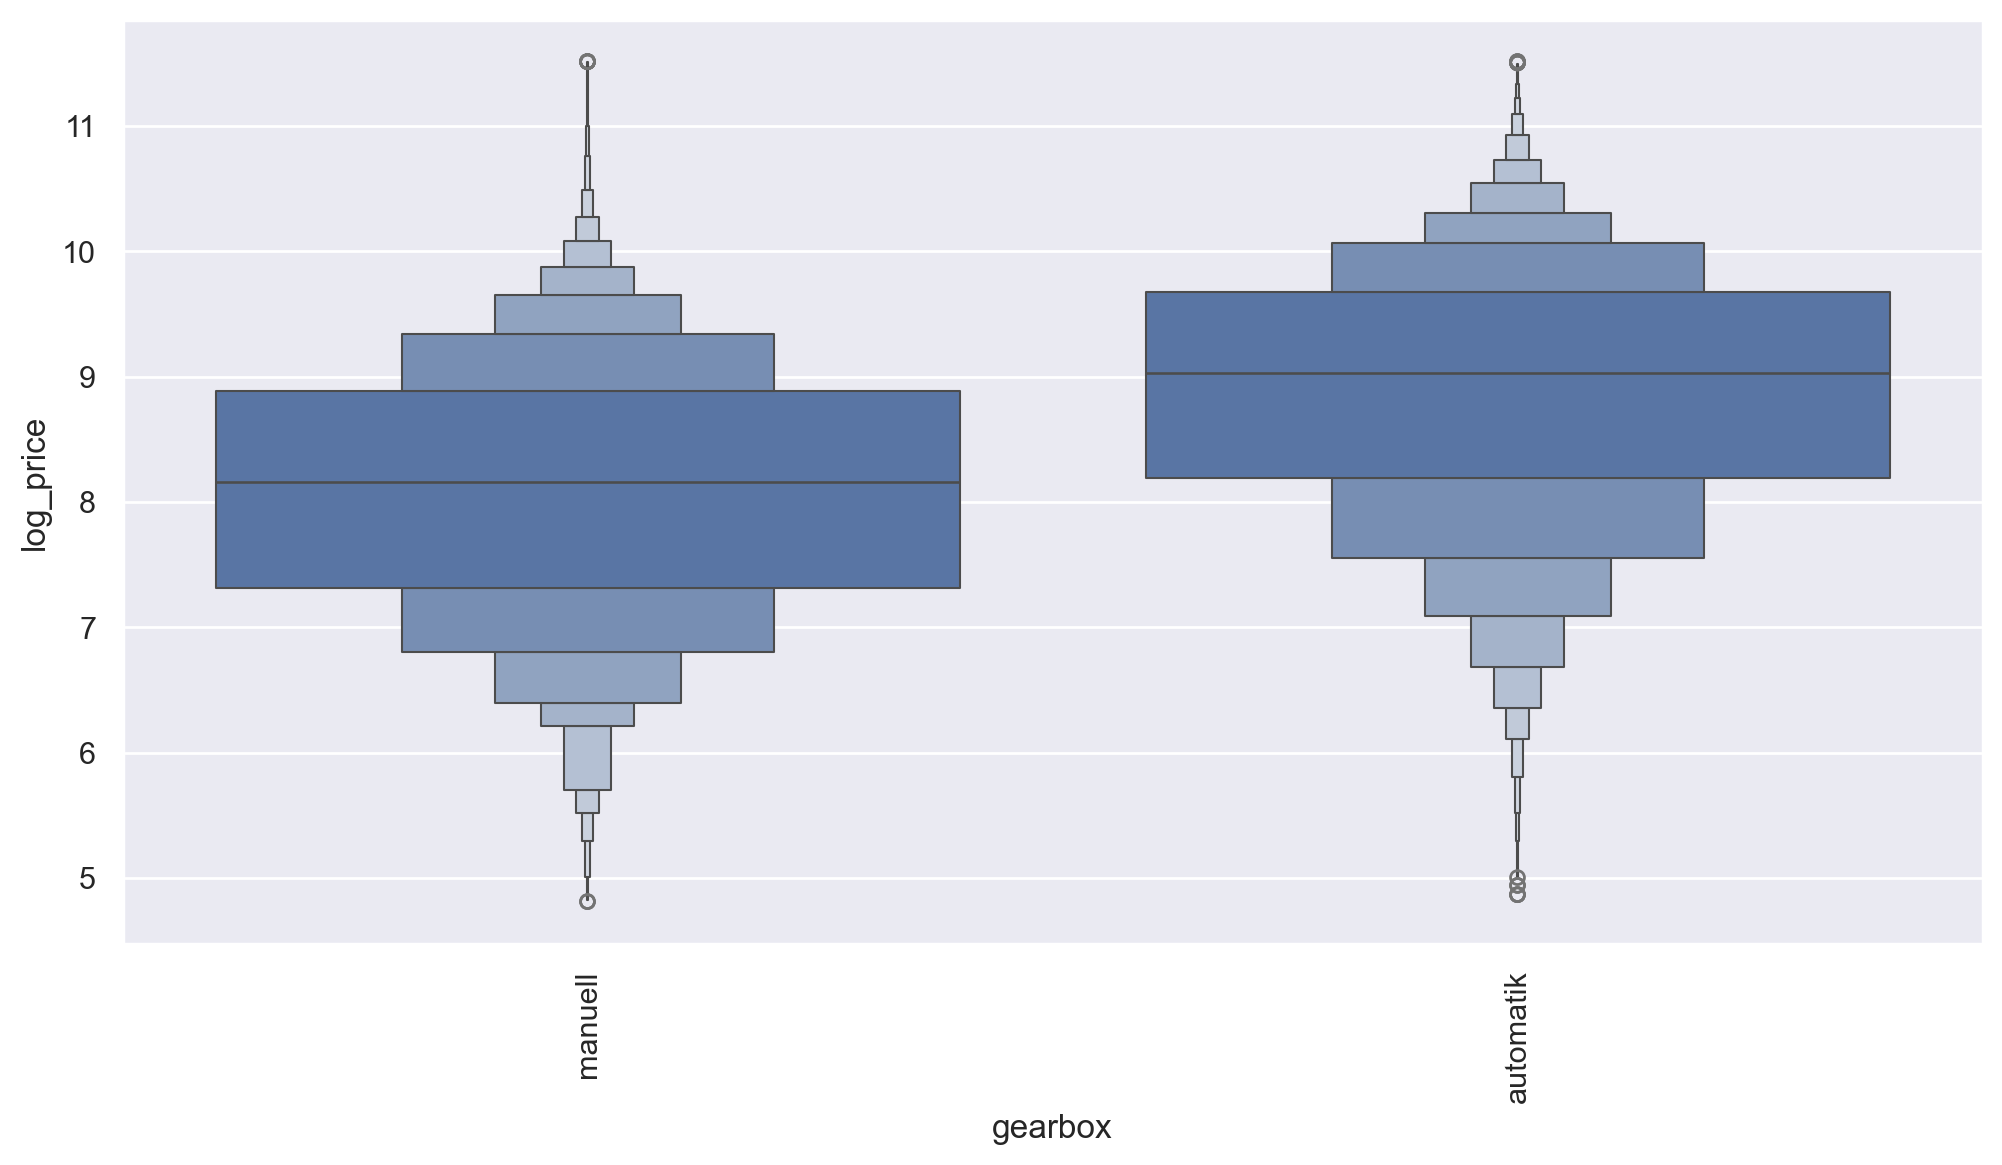

In [236]:
sns.boxenplot(data=data, x='gearbox', y='log_price')
plt.xticks(rotation=90)
plt.show()

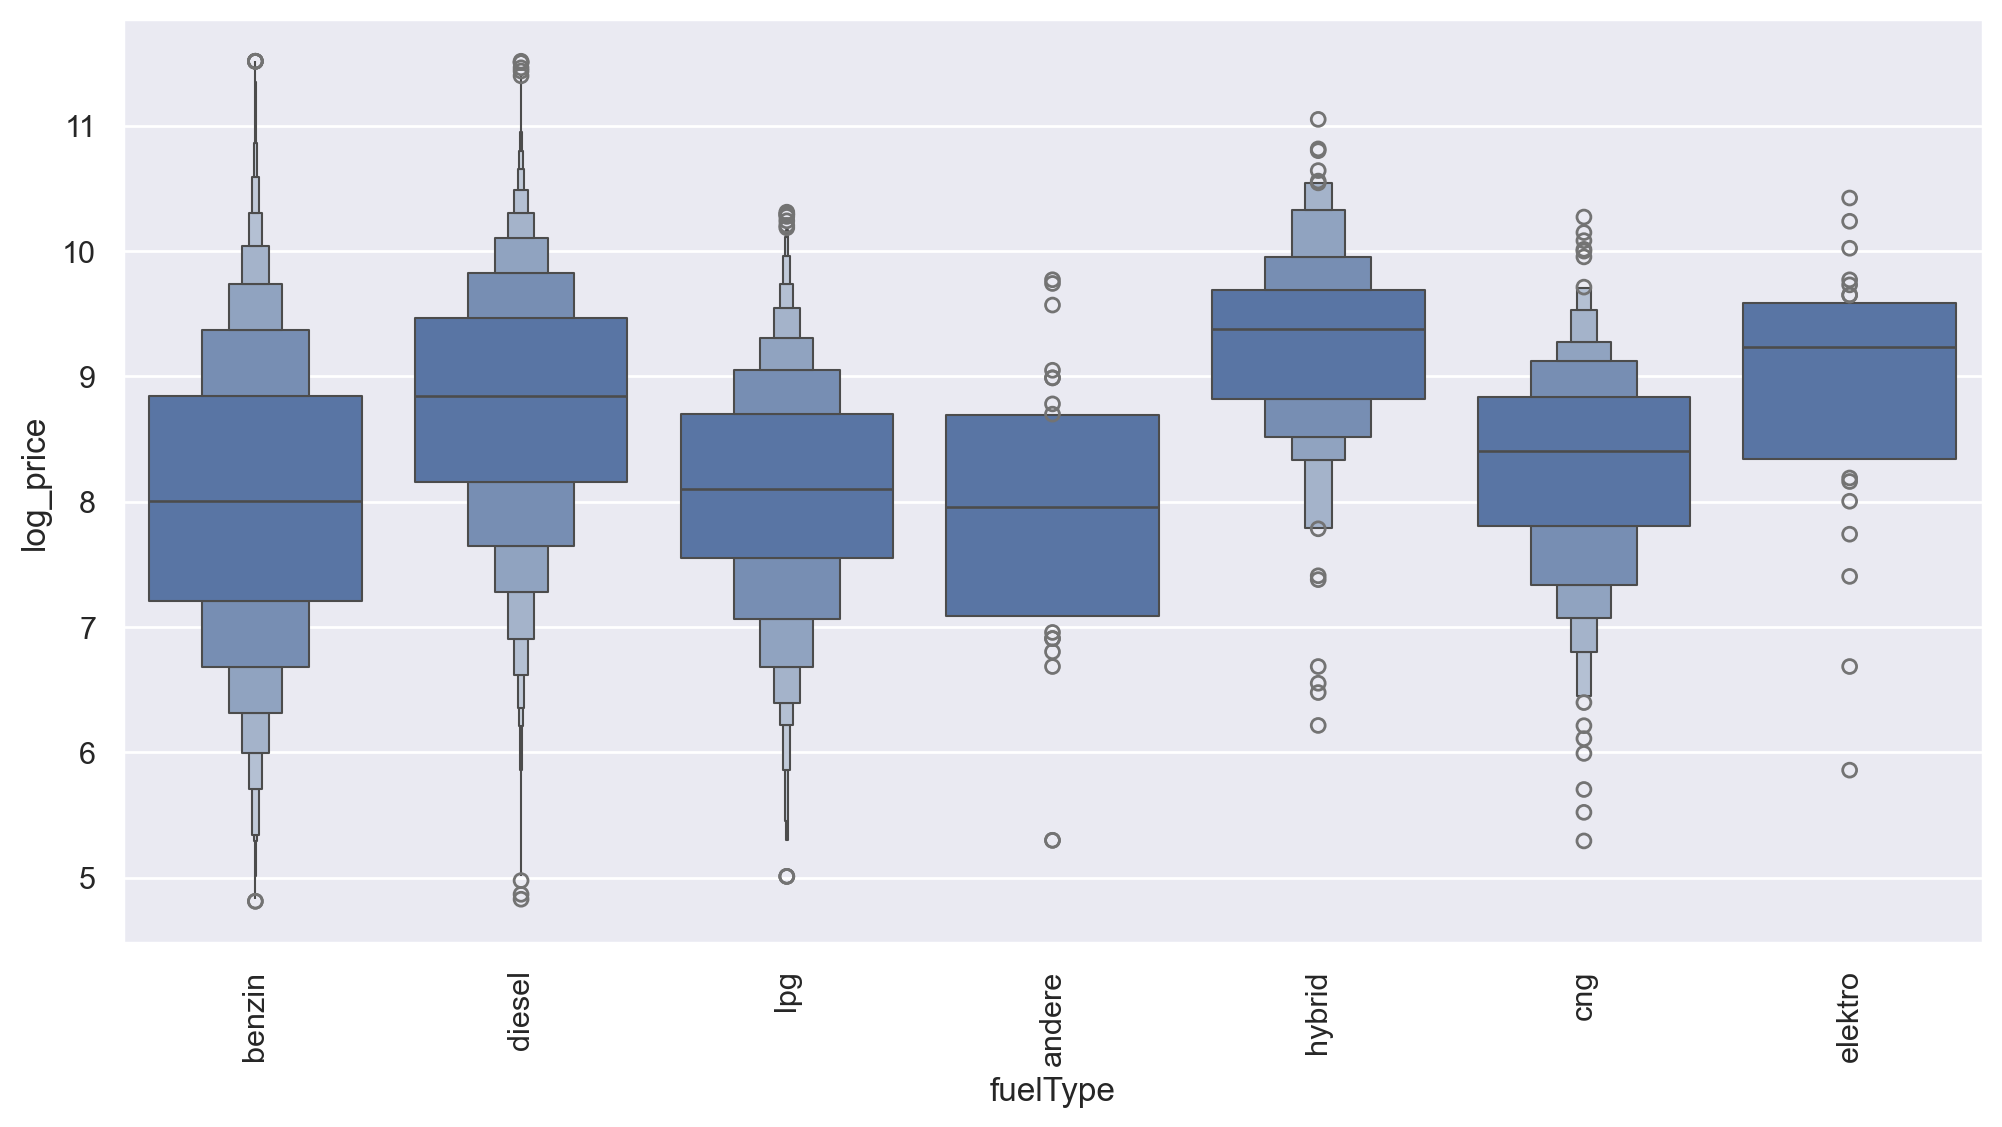

In [237]:
sns.boxenplot(data=data, x='fuelType', y='log_price')
plt.xticks(rotation=90)
plt.show()

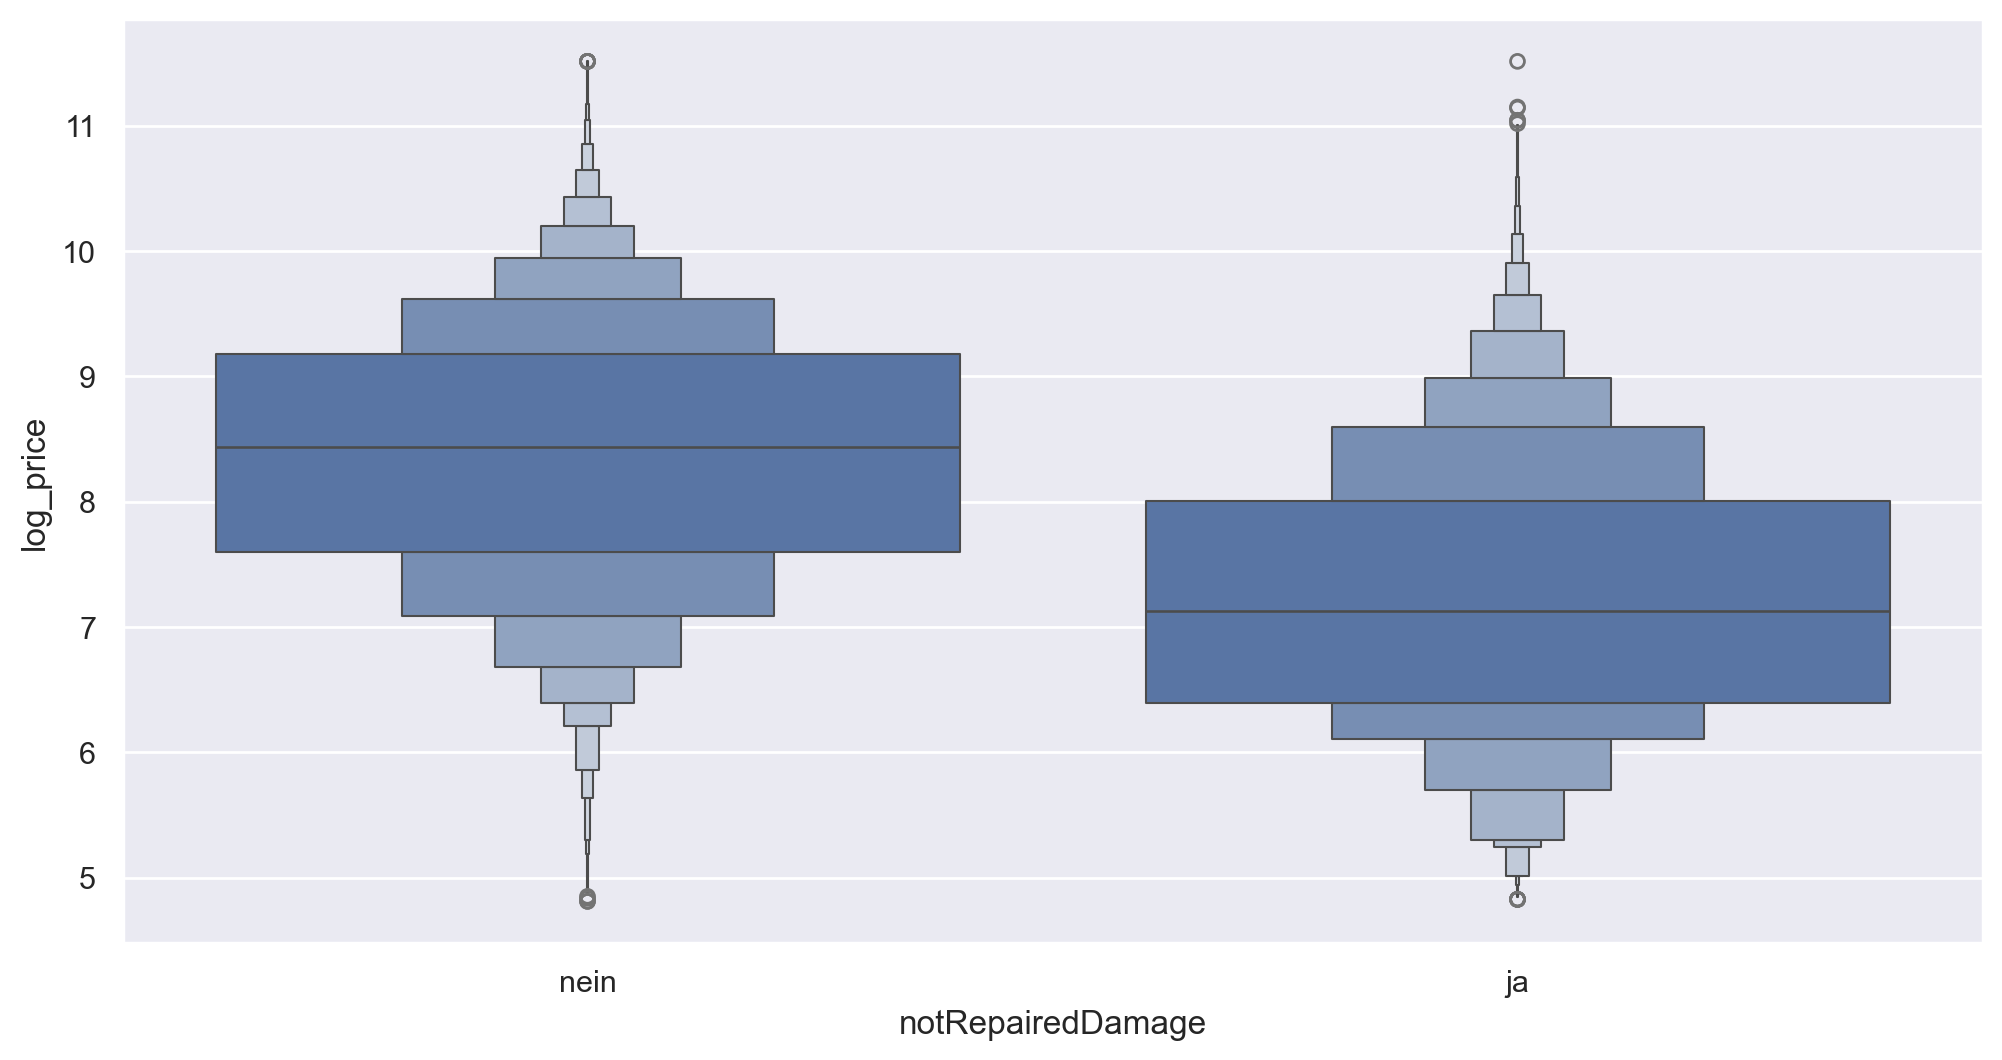

In [238]:
sns.boxenplot(data=data, x='notRepairedDamage', y='log_price')
plt.show()

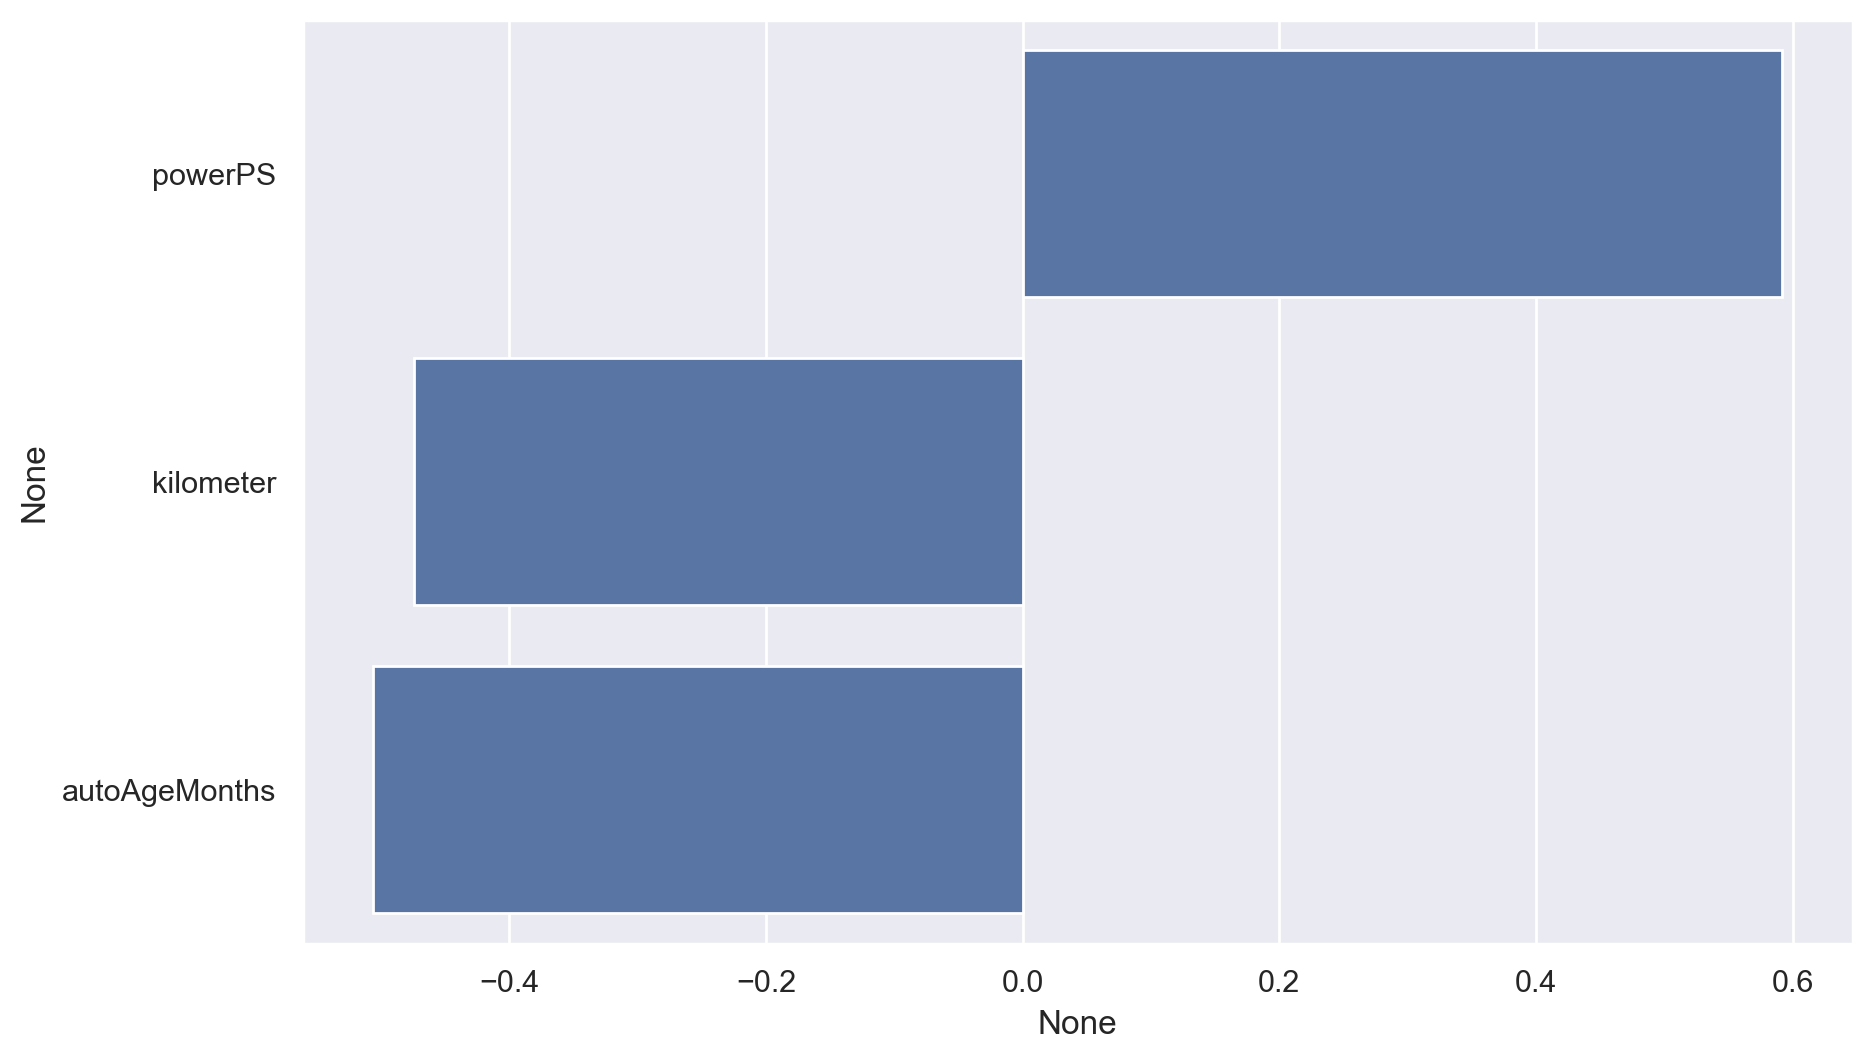

In [239]:
numeric_data = data[['powerPS', 'kilometer', 'autoAgeMonths']]
numeric_features = numeric_data.columns
corr = data[numeric_features].corrwith(data['price']).sort_values(ascending=False)
plot = sns.barplot(y=corr.index, x=corr)
plot.figure.set_size_inches(10, 6)

In [240]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType', 'gearbox', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

# YOUR CODE (EDA):

In [241]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [242]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [243]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=10)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [244]:
# YOUR CODE:
from sklearn.metrics import r2_score

lambdas = np.logspace(-5, 1, 100)
methods = ['full', 'stochastic', 'momentum', 'adam']
r2_history = []
iteration_history = []
r2_test_history = []
r2_train_history = []
loss_history = []
lambda_history = []
for method in methods:
    r2 = 0
    iteration = 0
    r2_test = 0
    r2_train = 0
    loss = 0
    lmbd = 0
    for lambda_ in lambdas:
        model = LinearRegression(descent_config={'descent_name': method,
                                                 'kwargs': {'dimension': X_val.shape[1],
                                                            'lambda_': lambda_}})
        model.fit(X_val, y_val.to_numpy())
        r2_ = r2_score(model.predict(X_val), y_val)
        if r2_ > r2:
            r2 = r2_
            iteration = len(model.loss_history)
            r2_train = r2_score(model.predict(X_train), y_train)
            r2_test = r2_score(model.predict(X_test), y_test)
            loss = model.loss_history
            model.fit(X_train, y_train.to_numpy())
            lmbd = lambda_
    loss_history.append(loss)
    r2_history.append(r2)
    iteration_history.append(iteration)
    r2_test_history.append(r2_test)
    r2_train_history.append(r2_train)
    lambda_history.append(lmbd)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:78: RuntimeWarning: overflow encountered in square
  return np.sum((y - x @ self.w)**2) / len(y)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(delta**2) < self.tolerance:
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:875: RuntimeWarning: invalid va

In [245]:
for i, method in enumerate(methods):
    print(method)
    print('iteration:', iteration_history[i])
    print('r2:', r2_history[i])
    print('r2_train:', r2_train_history[i])
    print('r2_test:', r2_test_history[i])
    print('lambda:', lambda_history[i])
    print()

full
iteration: 95
r2: 0.6575263816933631
r2_train: 0.6704480510442986
r2_test: 0.6695822637141919
lambda: 1.873817422860383

stochastic
iteration: 180
r2: 0.620690447412106
r2_train: 0.6388470385625729
r2_test: 0.6368524098122299
lambda: 0.4037017258596558

momentum
iteration: 274
r2: 0.6933790569656588
r2_train: 0.7028544376940311
r2_test: 0.7025903570012817
lambda: 1.873817422860383

adam
iteration: 156
r2: 0.717379226880743
r2_train: 0.727226450385657
r2_test: 0.7289663135895953
lambda: 8.697490026177835



### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

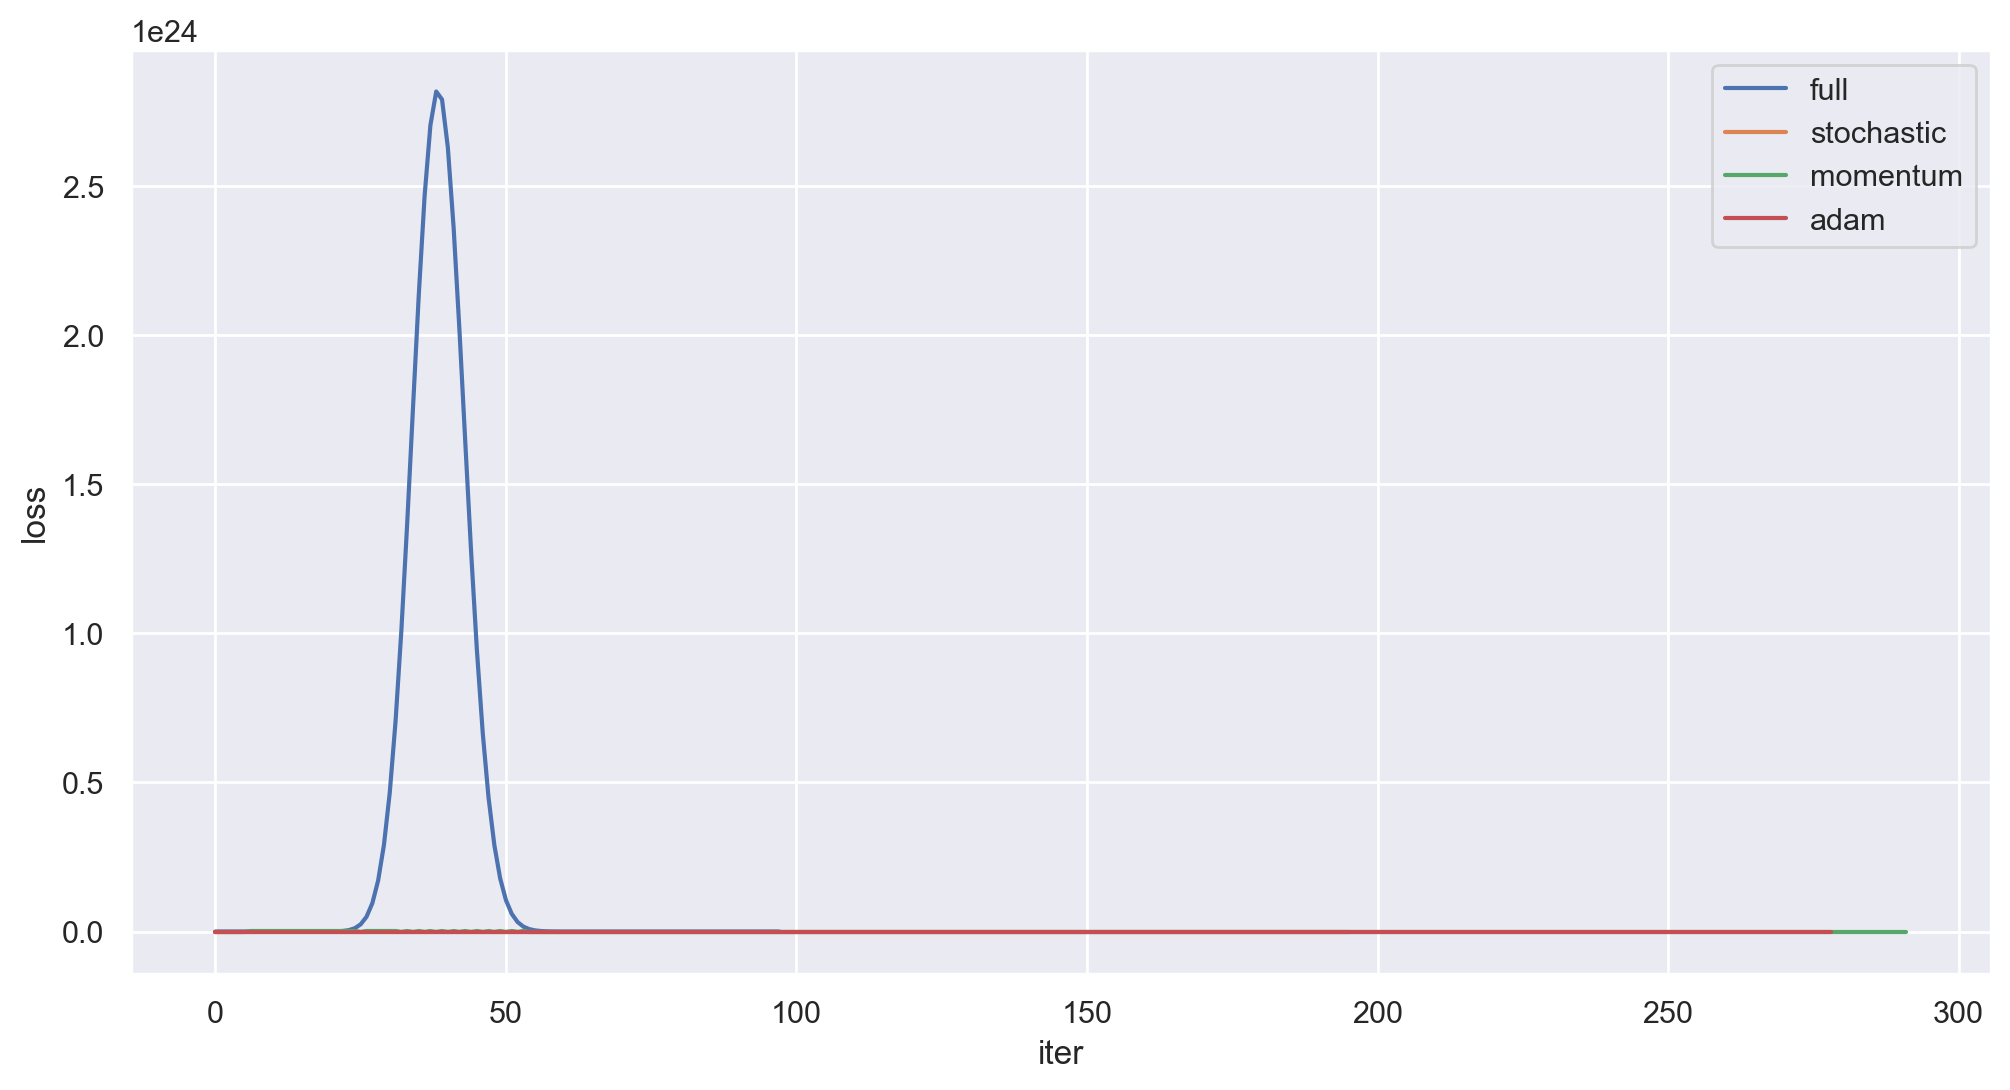

In [246]:
# YOUR CODE:
plt.plot(loss_history[0], label='full')
plt.plot(loss_history[1], label='stochastic')
plt.plot(loss_history[2], label='momentum')
plt.plot(loss_history[3], label='adam')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

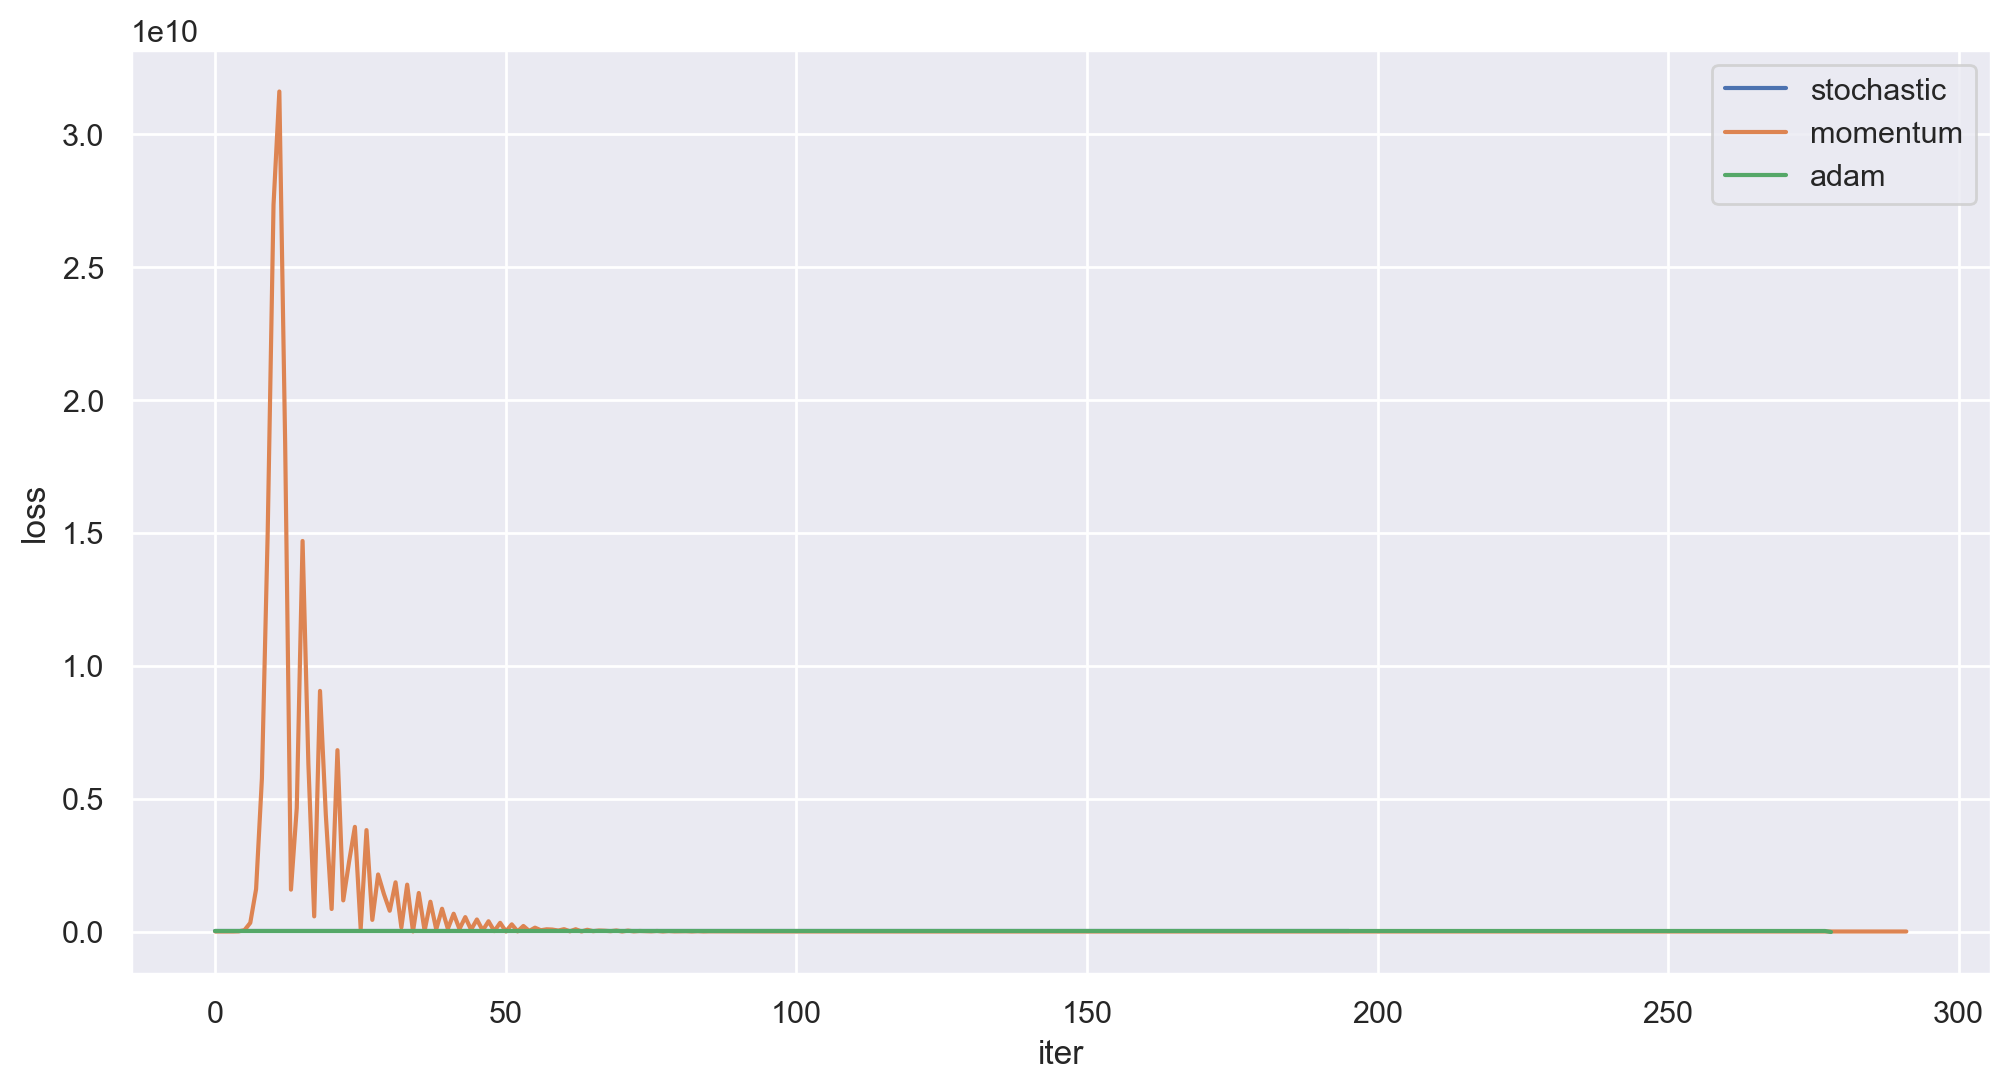

In [247]:
plt.plot(loss_history[1], label='stochastic')
plt.plot(loss_history[2], label='momentum')
plt.plot(loss_history[3], label='adam')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

<!-- `### ваше решение тут ###` -->
Ну, судя по табличным данным, у Adam самая большая $R^2$. На графике его колбасит конечно сильно в начале, но потом он начинает быстро сходиться, так что ничего страшного. Adam тащит короче.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [248]:
import time
batch_sizes = np.arange(5, 500, 10)
time_history = np.zeros(len(batch_sizes))
iteration_history = np.zeros(len(batch_sizes))

# YOUR CODE:
for _ in range(10):
    times = []
    iterations = []
    for batch_size in batch_sizes:
        start = time.time()
        model = LinearRegression(descent_config={'descent_name': 'stochastic',
                                                 'kwargs': {'dimension': X_train.shape[1],
                                                            'lambda_': lambda_history[1],
                                                            'batch_size': batch_size}})
        model.fit(X_train, y_train.to_numpy())
        end = time.time()
        times.append(end - start)
        iterations.append(len(model.loss_history))
    time_history += np.array(times)
    iteration_history += np.array(iterations)

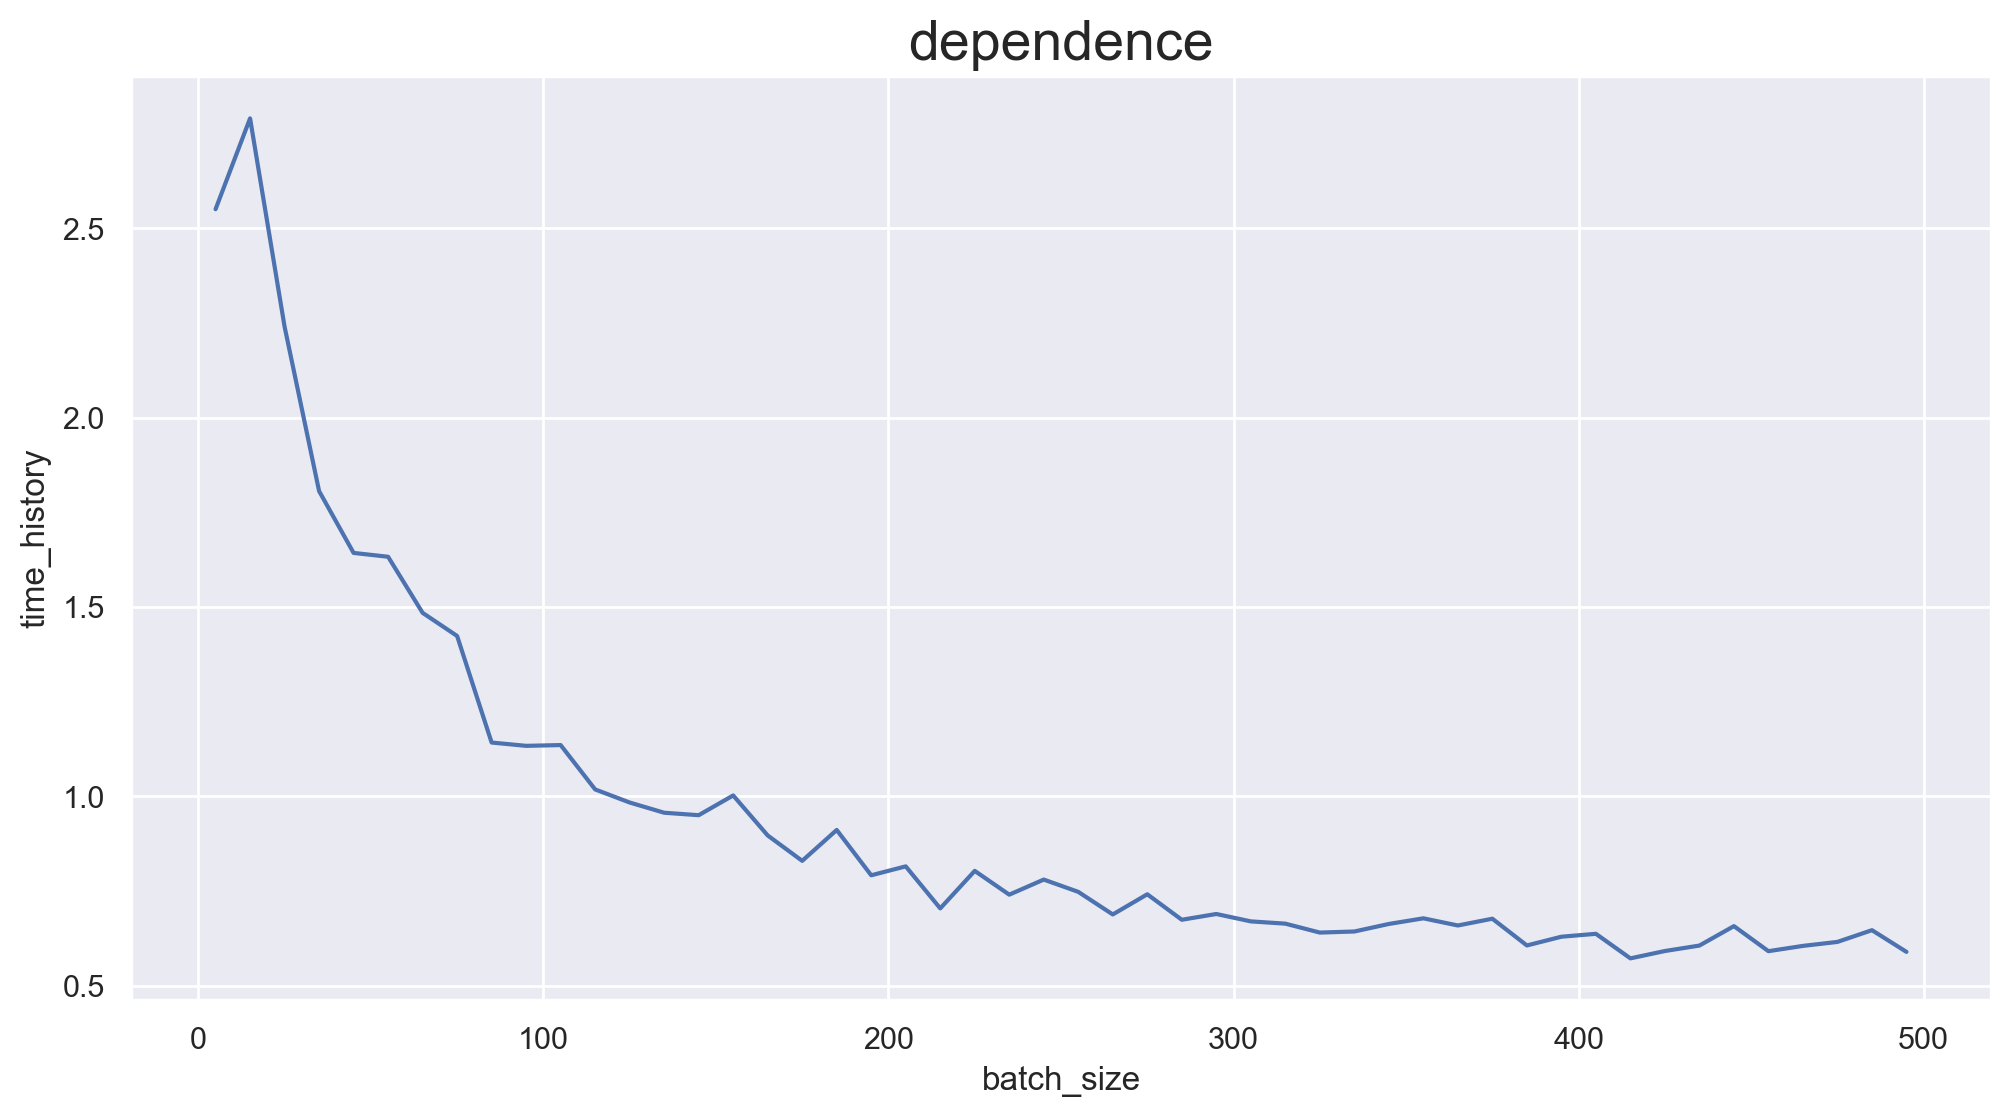

In [249]:
plt.plot(batch_sizes, time_history)
plt.xlabel('batch_size')
plt.ylabel('time_history')
plt.title('dependence', fontsize=20)
plt.show()

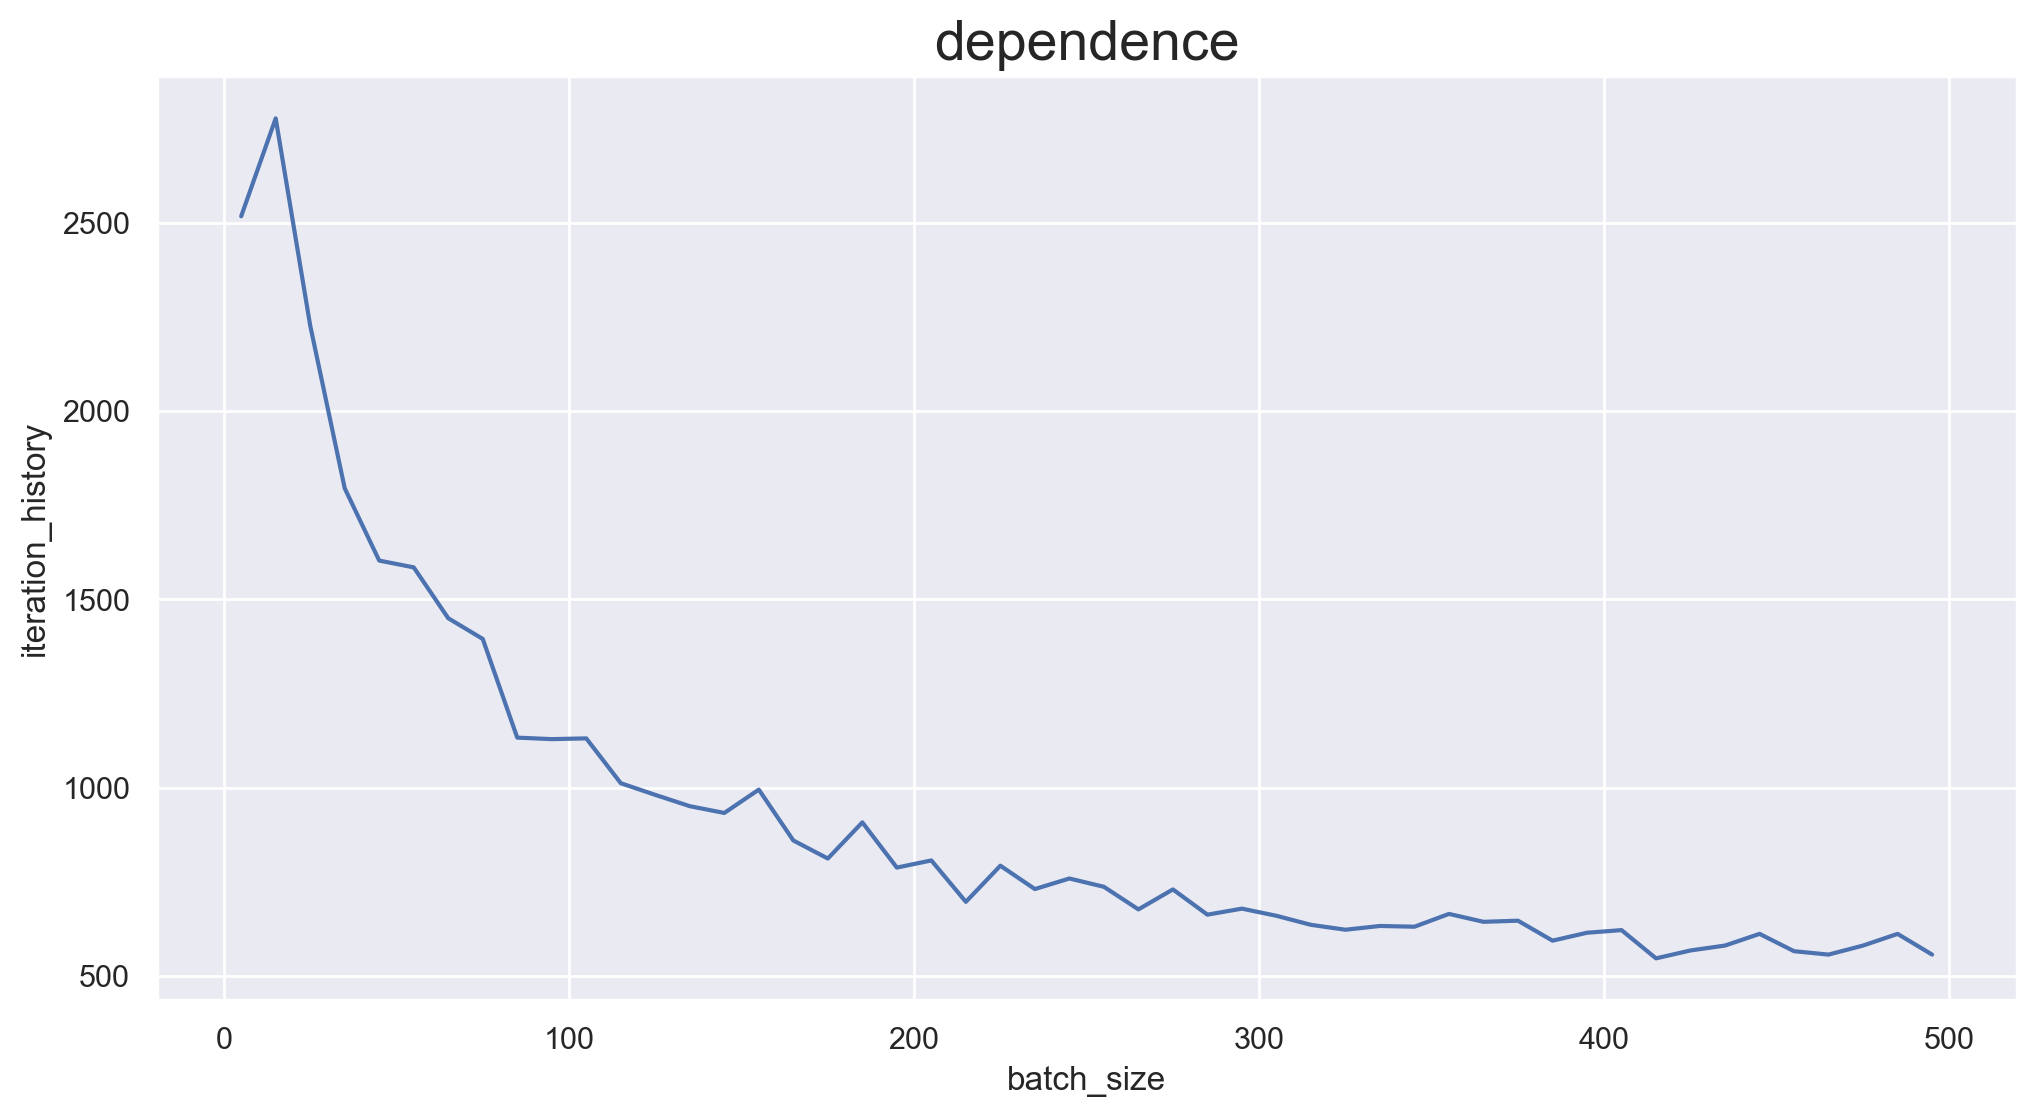

In [250]:
plt.plot(batch_sizes, iteration_history)
plt.xlabel('batch_size')
plt.ylabel('iteration_history')
plt.title('dependence', fontsize=20)
plt.show()

<!-- `### ваше решение тут ###` -->
Как будто бы, чем больше размер батча, тем лучше: мы тратим меньше времени (потому что вычисления более точные) и соответственно меньше итераций. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: 124761432

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [251]:
# YOUR CODE:
lambdas = np.logspace(-5, 1, 20)
mus = np.logspace(-10, 0.5, 20)
methods = ['full', 'stochastic', 'momentum', 'adam']
r2_history = []
iteration_history = []
r2_test_history = []
r2_train_history = []
loss_history = []
lambda_history = []
r2_history_l2 = []
iteration_history_l2 = []
r2_test_history_l2 = []
r2_train_history_l2 = []
loss_history_l2 = []
lambda_history_l2 = []
mu_history_l2 = []
for method in methods:
    r2_l2 = 0
    iteration_l2 = 0
    r2_test_l2 = 0
    r2_train_l2 = 0
    loss_l2 = 0
    lmbd_l2 = 0
    mu_l2 = 0
    r2 = 0
    iteration = 0
    r2_test = 0
    r2_train = 0
    loss = 0
    lmbd = 0
    for mu in mus:
        for lambda_ in lambdas:
            model = LinearRegression(descent_config={'descent_name': method,
                                                     'regularized': True,
                                                     'kwargs': {'dimension': X_val.shape[1],
                                                                'lambda_': lambda_,
                                                                'mu': mu}})
            model.fit(X_val, y_val.to_numpy())
            r2_l2_ = r2_score(model.predict(X_val), y_val)
            if r2_l2_ > r2_l2:
                r2_l2 = r2_l2_
                iteration_l2 = len(model.loss_history)
                r2_train_l2 = r2_score(model.predict(X_train), y_train)
                r2_test_l2 = r2_score(model.predict(X_test), y_test)
                loss_l2 = model.loss_history
                model.fit(X_train, y_train.to_numpy())
                lmbd_l2 = lambda_
                mu_l2 = mu
            model = LinearRegression(descent_config={'descent_name': method,
                                                     'kwargs': {'dimension': X_val.shape[1],
                                                     'lambda_': lambda_}})
            model.fit(X_val, y_val.to_numpy())
            r2_ = r2_score(model.predict(X_val), y_val)
            if r2_ > r2:
                r2 = r2_
                iteration = len(model.loss_history)
                r2_train = r2_score(model.predict(X_train), y_train)
                r2_test = r2_score(model.predict(X_test), y_test)
                loss = model.loss_history
                model.fit(X_train, y_train.to_numpy())
                lmbd = lambda_
    loss_history.append(loss)
    r2_history.append(r2)
    iteration_history.append(iteration)
    r2_test_history.append(r2_test)
    r2_train_history.append(r2_train)
    lambda_history.append(lmbd)
    loss_history_l2.append(loss_l2)
    r2_history_l2.append(r2_l2)
    iteration_history_l2.append(iteration_l2)
    r2_test_history_l2.append(r2_test_l2)
    r2_train_history_l2.append(r2_train_l2)
    lambda_history_l2.append(lmbd_l2)
    mu_history_l2.append(mu_l2)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:78: RuntimeWarning: overflow encountered in square
  return np.sum((y - x @ self.w)**2) / len(y)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/linear_regression.py:41: RuntimeWarning: overflow encountered in square
  if np.sum(delta**2) < self.tolerance:
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1196: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1198: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:875: RuntimeWarning: invalid va

In [252]:
for i, method in enumerate(methods):
    print(method)
    print('r2_train with l2:', r2_train_history_l2[i])
    print('r2_test with l2:', r2_test_history_l2[i])
    print('r2_train:', r2_train_history[i])
    print('r2_test:', r2_test_history[i])
    print()

full
r2_train with l2: 0.6824535694655318
r2_test with l2: 0.6823980153042193
r2_train: 0.6542319723924648
r2_test: 0.6516822614361142

stochastic
r2_train with l2: 0.6844759035771875
r2_test with l2: 0.68357674371187
r2_train: 0.6723975058145413
r2_test: 0.6716298087893156

momentum
r2_train with l2: 0.716033635483975
r2_test with l2: 0.7162431504645828
r2_train: 0.6917785867112216
r2_test: 0.6930918333830229

adam
r2_train with l2: 0.7270493160240694
r2_test with l2: 0.7286562925803017
r2_train: 0.7269401572148522
r2_test: 0.728706365583468



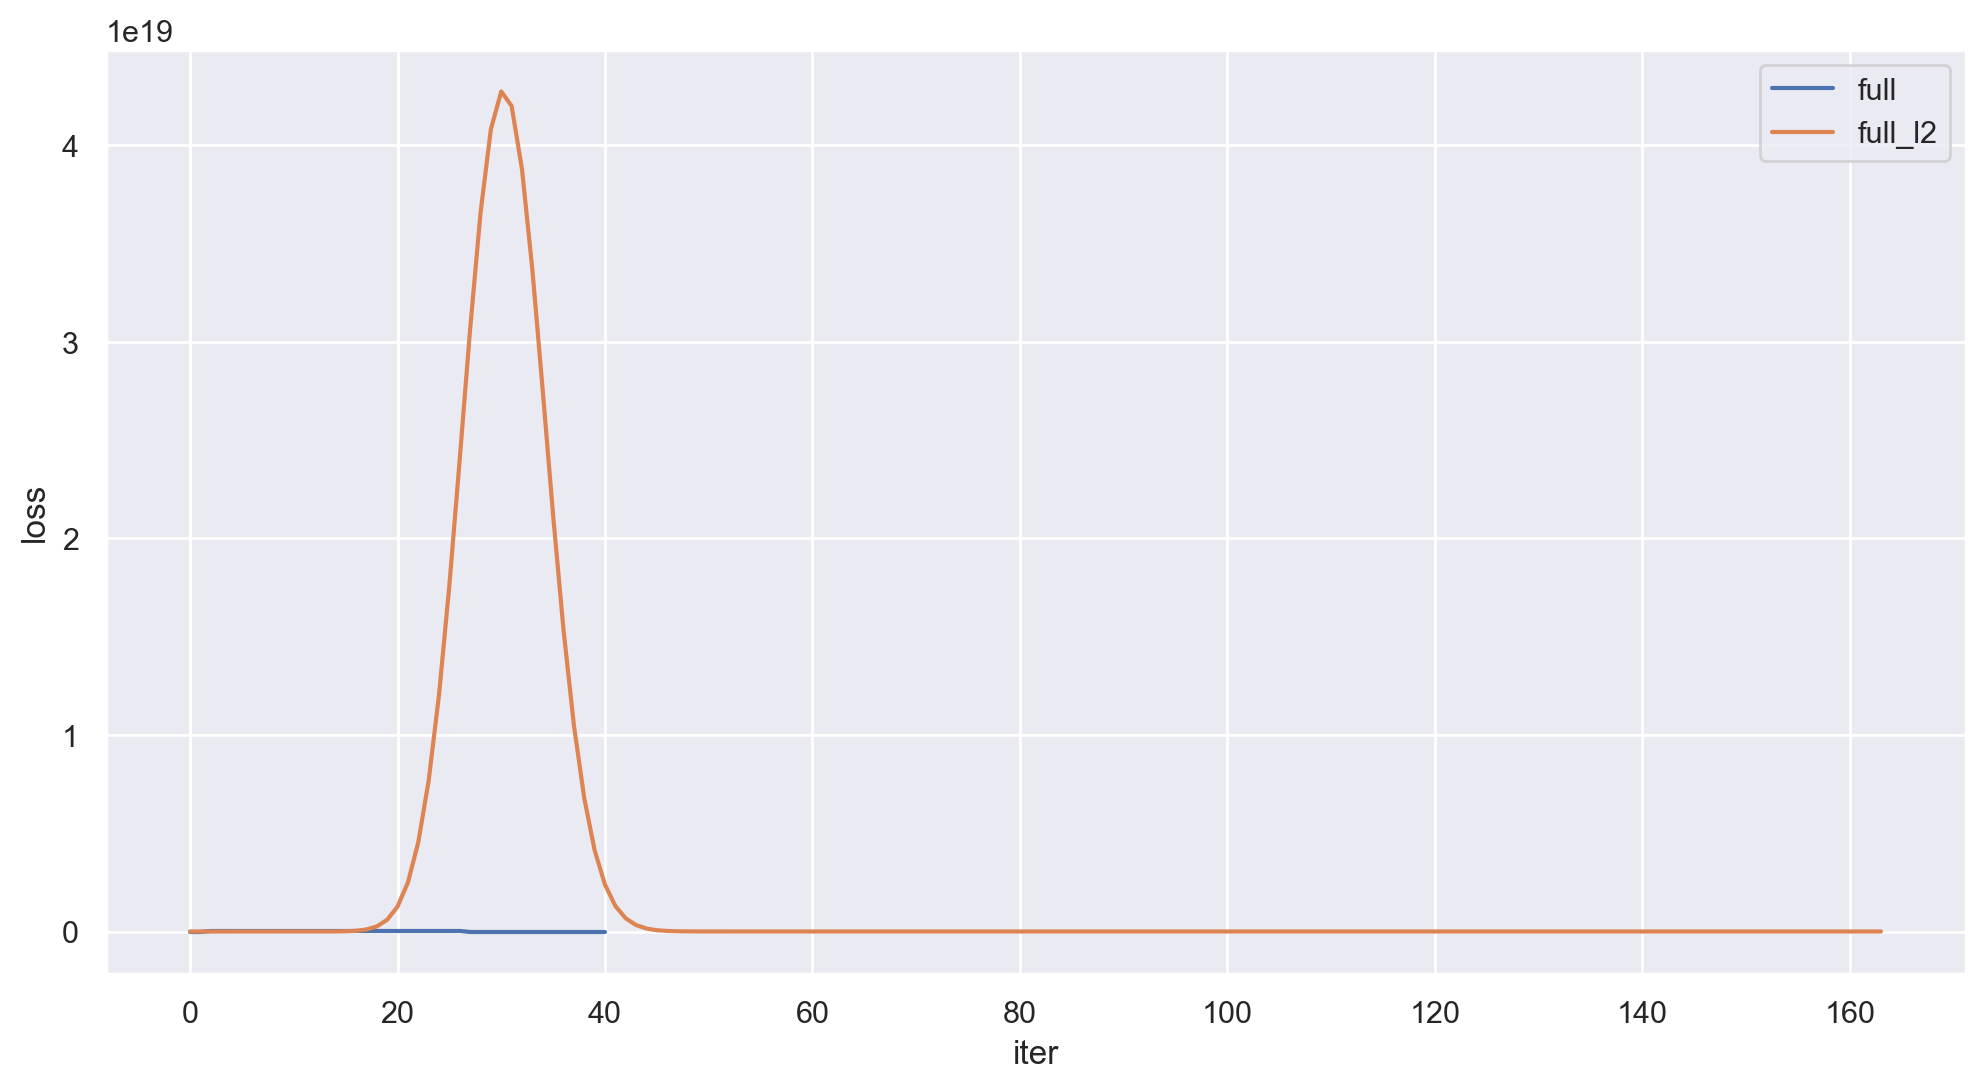

In [253]:
plt.plot(loss_history[0], label='full')
plt.plot(loss_history_l2[0], label='full_l2')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

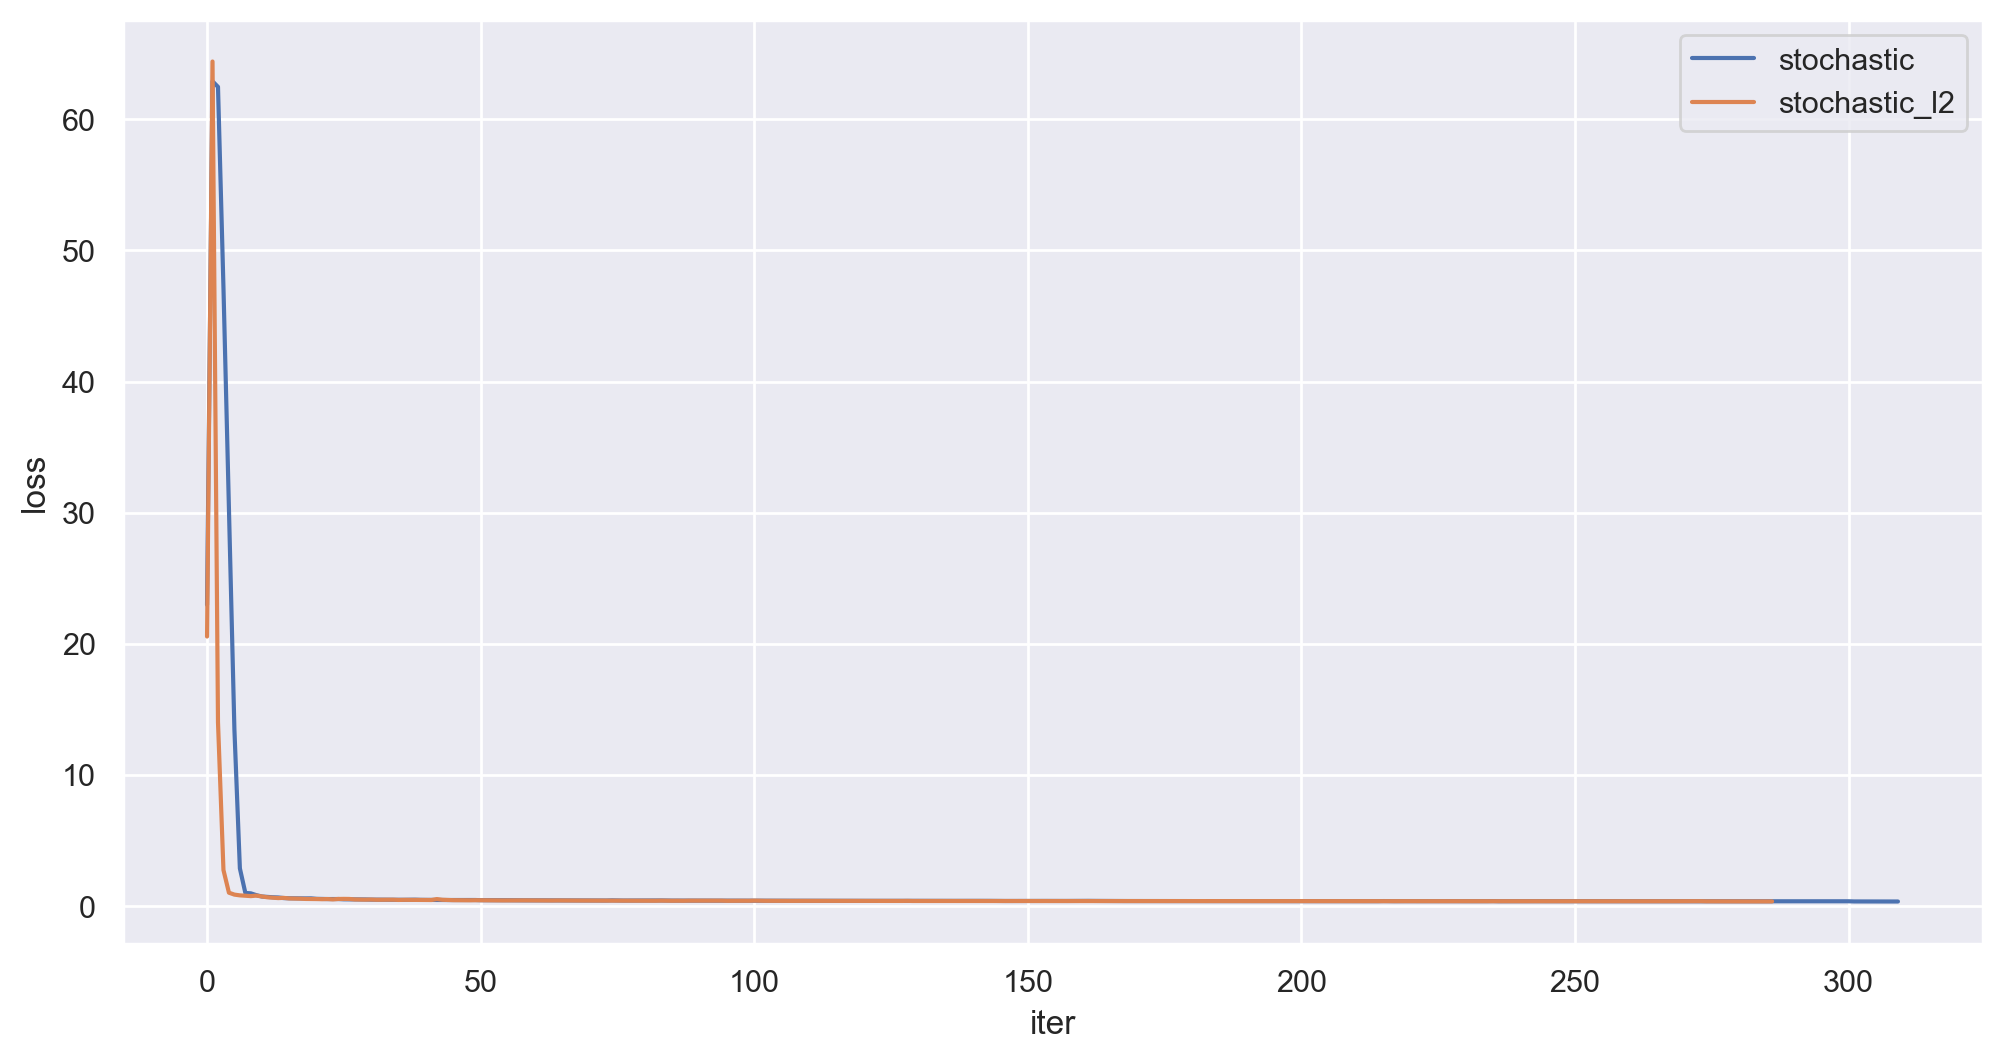

In [254]:
plt.plot(loss_history[1], label='stochastic')
plt.plot(loss_history_l2[1], label='stochastic_l2')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

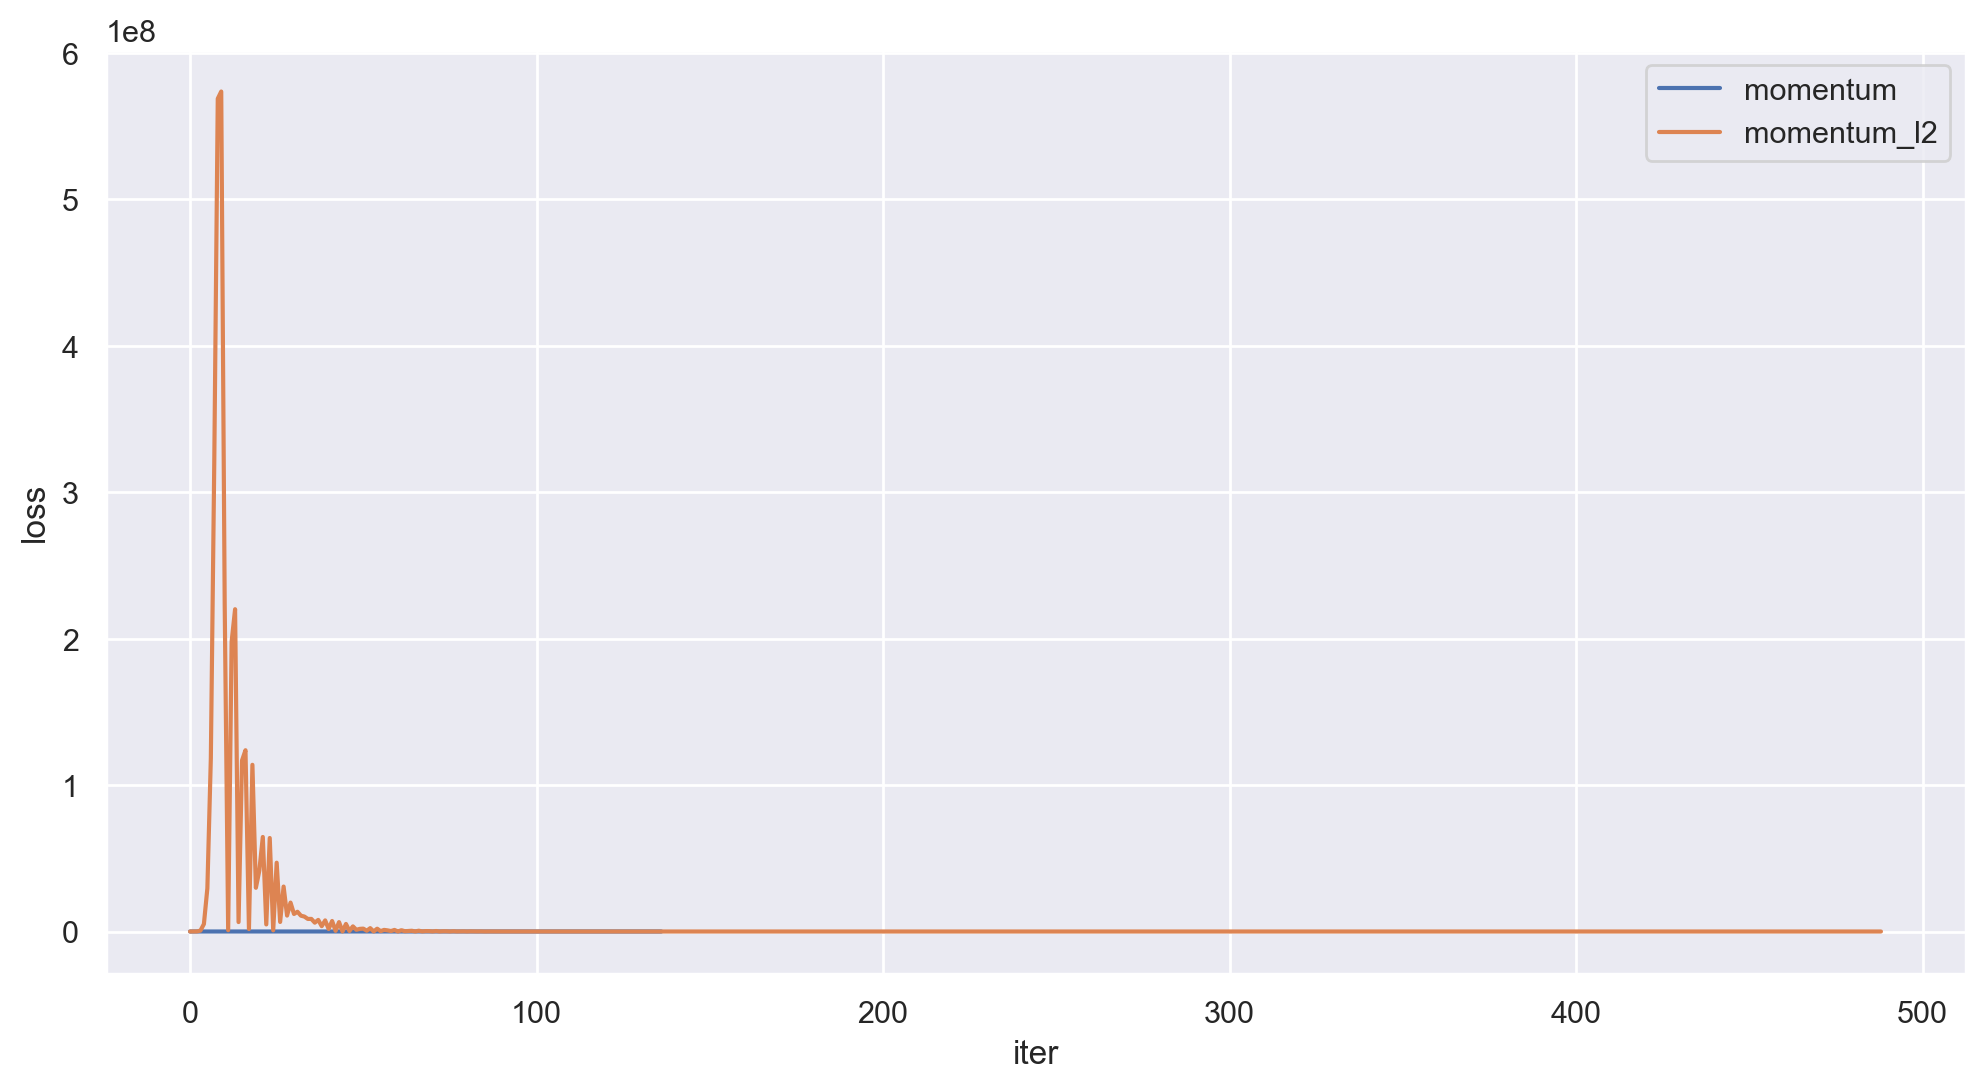

In [255]:
plt.plot(loss_history[2], label='momentum')
plt.plot(loss_history_l2[2], label='momentum_l2')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

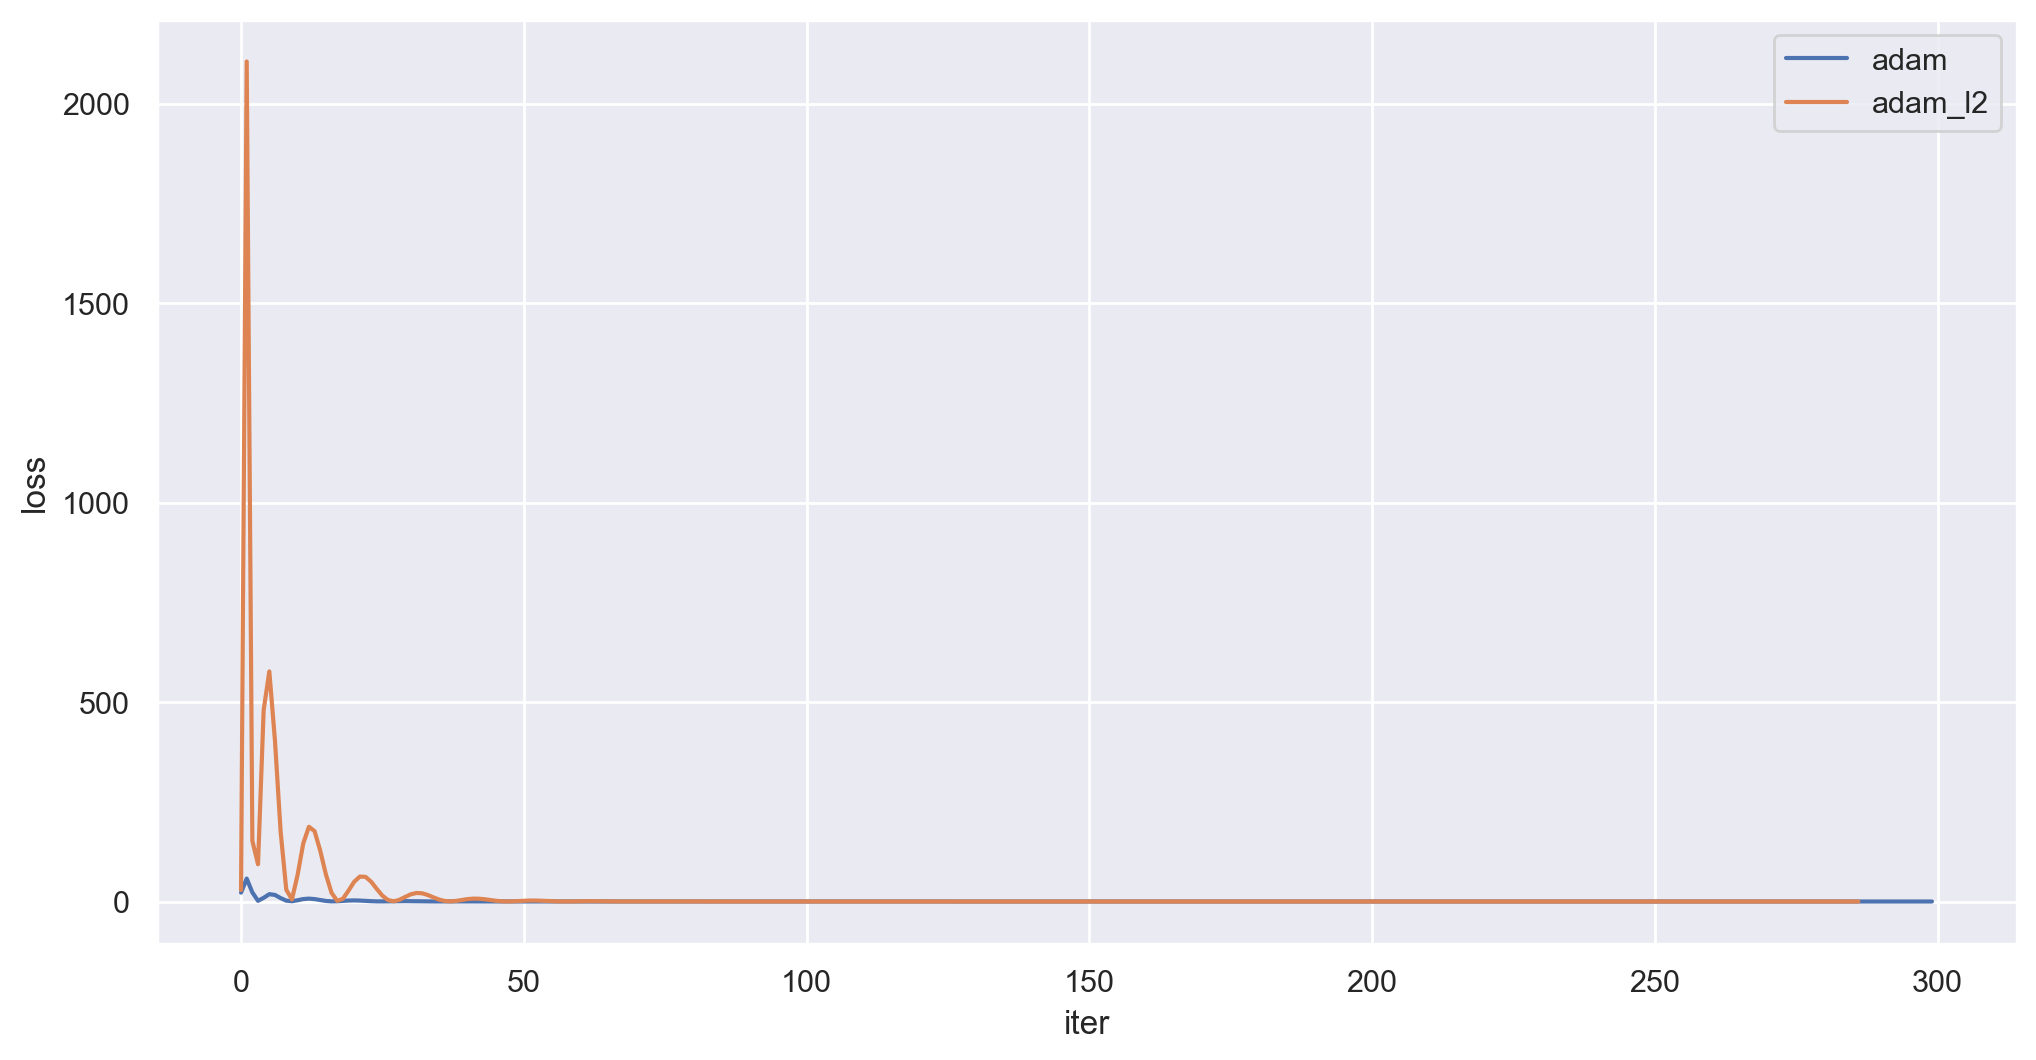

In [256]:
plt.plot(loss_history[3], label='adam')
plt.plot(loss_history_l2[3], label='adam_l2')
plt.xlabel('iter')
plt.ylabel('loss')
plt.legend()
plt.show()

<!-- `### ваше решение тут ###` -->
Чего-то с регуляризацией прям люто колбасит. Но судя по значениям, после l2 не очень сильно улучшилось качество (в стохастическом вообще ухудшилось, лол). 

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

<!-- `### ваше решение тут ###` -->

$$
    \frac{\partial}{\partial w}\log\left(\cosh(y - Xw)\right) = (\tanh{(y - Xw)}) \cdot \frac{\partial}{\partial w}(y - Xw) = -(\tanh{(y - Xw)}) \cdot X
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:
lambdas = np.logspace(-6, 2, 100)
methods = ['full', 'stochastic', 'momentum', 'adam']
r2_history = []
iteration_history = []
r2_test_history = []
r2_train_history = []
loss_history = []
lambda_history = []
for method in methods:
    r2 = 0
    iteration = 0
    r2_test = 0
    r2_train = 0
    loss = 0
    lmbd = 0
    for lambda_ in lambdas:
        model = LinearRegression(descent_config={'descent_name': method,
                                                 'kwargs': {'dimension': X_val.shape[1],
                                                            'lambda_': lambda_,
                                                            'loss_function': LossFunction.LogCosh}})
        model.fit(X_val, y_val.to_numpy())
        r2_ = r2_score(model.predict(X_val), y_val)
        if r2_ > r2:
            r2 = r2_
            iteration = len(model.loss_history)
            r2_train = r2_score(model.predict(X_train), y_train)
            r2_test = r2_score(model.predict(X_test), y_test)
            loss = model.loss_history
            model.fit(X_train, y_train.to_numpy())
            lmbd = lambda_
    loss_history.append(loss)
    r2_history.append(r2)
    iteration_history.append(iteration)
    r2_test_history.append(r2_test)
    r2_train_history.append(r2_train)
    lambda_history.append(lmbd)

/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:80: RuntimeWarning: overflow encountered in cosh
  return np.sum(np.log(np.cosh(y - x @ self.w))) / len(y)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:80: RuntimeWarning: overflow encountered in cosh
  return np.sum(np.log(np.cosh(y - x @ self.w))) / len(y)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:80: RuntimeWarning: overflow encountered in cosh
  return np.sum(np.log(np.cosh(y - x @ self.w))) / len(y)


In [263]:
for i, method in enumerate(methods):
    print(method)
    print('iteration:', iteration_history[i])
    print('r2:', r2_history[i])
    print('r2_train:', r2_train_history[i])
    print('r2_test:', r2_test_history[i])
    print('lambda:', lambda_history[i])
    print()

full
iteration: 276
r2: 0.6815021141692165
r2_train: 0.6943935751194383
r2_test: 0.6949182889574964
lambda: 10.722672220103254

stochastic
iteration: 301
r2: 0.6833972184347528
r2_train: 0.6990687446461138
r2_test: 0.6967805010959284
lambda: 4.229242874389508

momentum
iteration: 299
r2: 0.7109650000435632
r2_train: 0.7229504642741786
r2_test: 0.7233928205537162
lambda: 7.39072203352579

adam
iteration: 197
r2: 0.7252615294598652
r2_train: 0.7363125908473432
r2_test: 0.7382288017187788
lambda: 27.185882427329457



Определённо log-cosh улучшил $R^2$, оно стало выше чем с MSE во всех методах.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

<!-- `### ваш кулинарный опыт тут ###` -->
### Инградиенты:

Мясо (на свой вкус), перец, капуста кабачок, проростки бобовые, морковка. Соус "Яки Удон", кунжут. 

### Рецепт:

Отварить лапшу. Нарезать овощи соломкой. Далее обжарить мясо, потом постепенно добавлять овощи, перемешивая. Добавляем соус. После добавить лапшу и остаток соуса и немного бульона из под лапши. Весь процесс жарки должен занимать примерно минут 8-10. Посыпать кунжутом. Приятного аппетита! 

Любой гость будет доволен такому блюду! Так произошло и с моим, но он попросил остаться анонимным.

<img src="удон.jpg">

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [273]:
# YOUR CODE:
lambdas = np.logspace(-6, 2, 100)
methods = ['adamax']
r2_history = []
iteration_history = []
r2_test_history = []
r2_train_history = []
loss_history = []
lambda_history = []
for method in methods:
    r2 = 0
    iteration = 0
    r2_test = 0
    r2_train = 0
    loss = 0
    lmbd = 0
    for lambda_ in lambdas:
        model = LinearRegression(descent_config={'descent_name': method,
                                                 'kwargs': {'dimension': X_val.shape[1],
                                                            'lambda_': lambda_,
                                                            'loss_function': LossFunction.LogCosh}})
        model.fit(X_val, y_val.to_numpy())
        r2_ = r2_score(model.predict(X_val), y_val)
        if r2_ > r2:
            r2 = r2_
            iteration = len(model.loss_history)
            r2_train = r2_score(model.predict(X_train), y_train)
            r2_test = r2_score(model.predict(X_test), y_test)
            loss = model.loss_history
            model.fit(X_train, y_train.to_numpy())
            lmbd = lambda_
    loss_history.append(loss)
    r2_history.append(r2)
    iteration_history.append(iteration)
    r2_test_history.append(r2_test)
    r2_train_history.append(r2_train)
    lambda_history.append(lmbd)

/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:80: RuntimeWarning: overflow encountered in cosh
  return np.sum(np.log(np.cosh(y - x @ self.w))) / len(y)
/Users/konstantin/Desktop/HSE/ДЗ/ML/HW-3/descents.py:80: RuntimeWarning: overflow encountered in cosh
  return np.sum(np.log(np.cosh(y - x @ self.w))) / len(y)


In [274]:
for i, method in enumerate(methods):
    print(method)
    print('iteration:', iteration_history[i])
    print('r2:', r2_history[i])
    print('r2_train:', r2_train_history[i])
    print('r2_test:', r2_test_history[i])
    print('lambda:', lambda_history[i])
    print()

adamax
iteration: 252
r2: 0.725291471590404
r2_train: 0.7362435983206256
r2_test: 0.7383424294973093
lambda: 39.44206059437664



Результат AdaMax почти такой же как и обычного Adam. Круто. 

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [286]:
# YOUR CODE: